In [104]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import sweetviz as sv

import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder

from scipy import stats
from scipy.stats import norm, skew


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np
from sklearn.feature_selection import mutual_info_regression

from category_encoders import MEstimateEncoder, TargetEncoder
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('train (2).csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
report= sv.analyze(df)
report.show_html("./report.html")

                                             |                                             | [  0%]   00:00 ->…

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Filling Nan

In [6]:
def missing_val(X):
    
    missing = X.isna().sum()/len(X)*100
    missing = missing.drop(missing[missing==0].index).sort_values(ascending=False)
    df_missing = pd.DataFrame({'missing_ratio': missing})
    return df_missing
missing_val(df)

,missing_ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [7]:
# Dropping utilities because all are the same - Allpub(All public utilities) except 1 record
df.drop("Utilities", axis=1, inplace=True)

# Dropping ID column
df.drop("Id", axis=1, inplace=True)

In [8]:
numerical_col= df.select_dtypes(exclude='object').columns
cat_col= df.select_dtypes(include='object').columns

num_NA=[]
cat_NA= []

for i,j in df[numerical_col].isnull().sum().to_dict().items():
    if j!=0:
        num_NA.append(i)
        
for i,j in df[cat_col].isnull().sum().to_dict().items():
    if j!=0:
        cat_NA.append(i)
        
print(num_NA)
print(cat_NA)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


C:\Users\EngMA\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


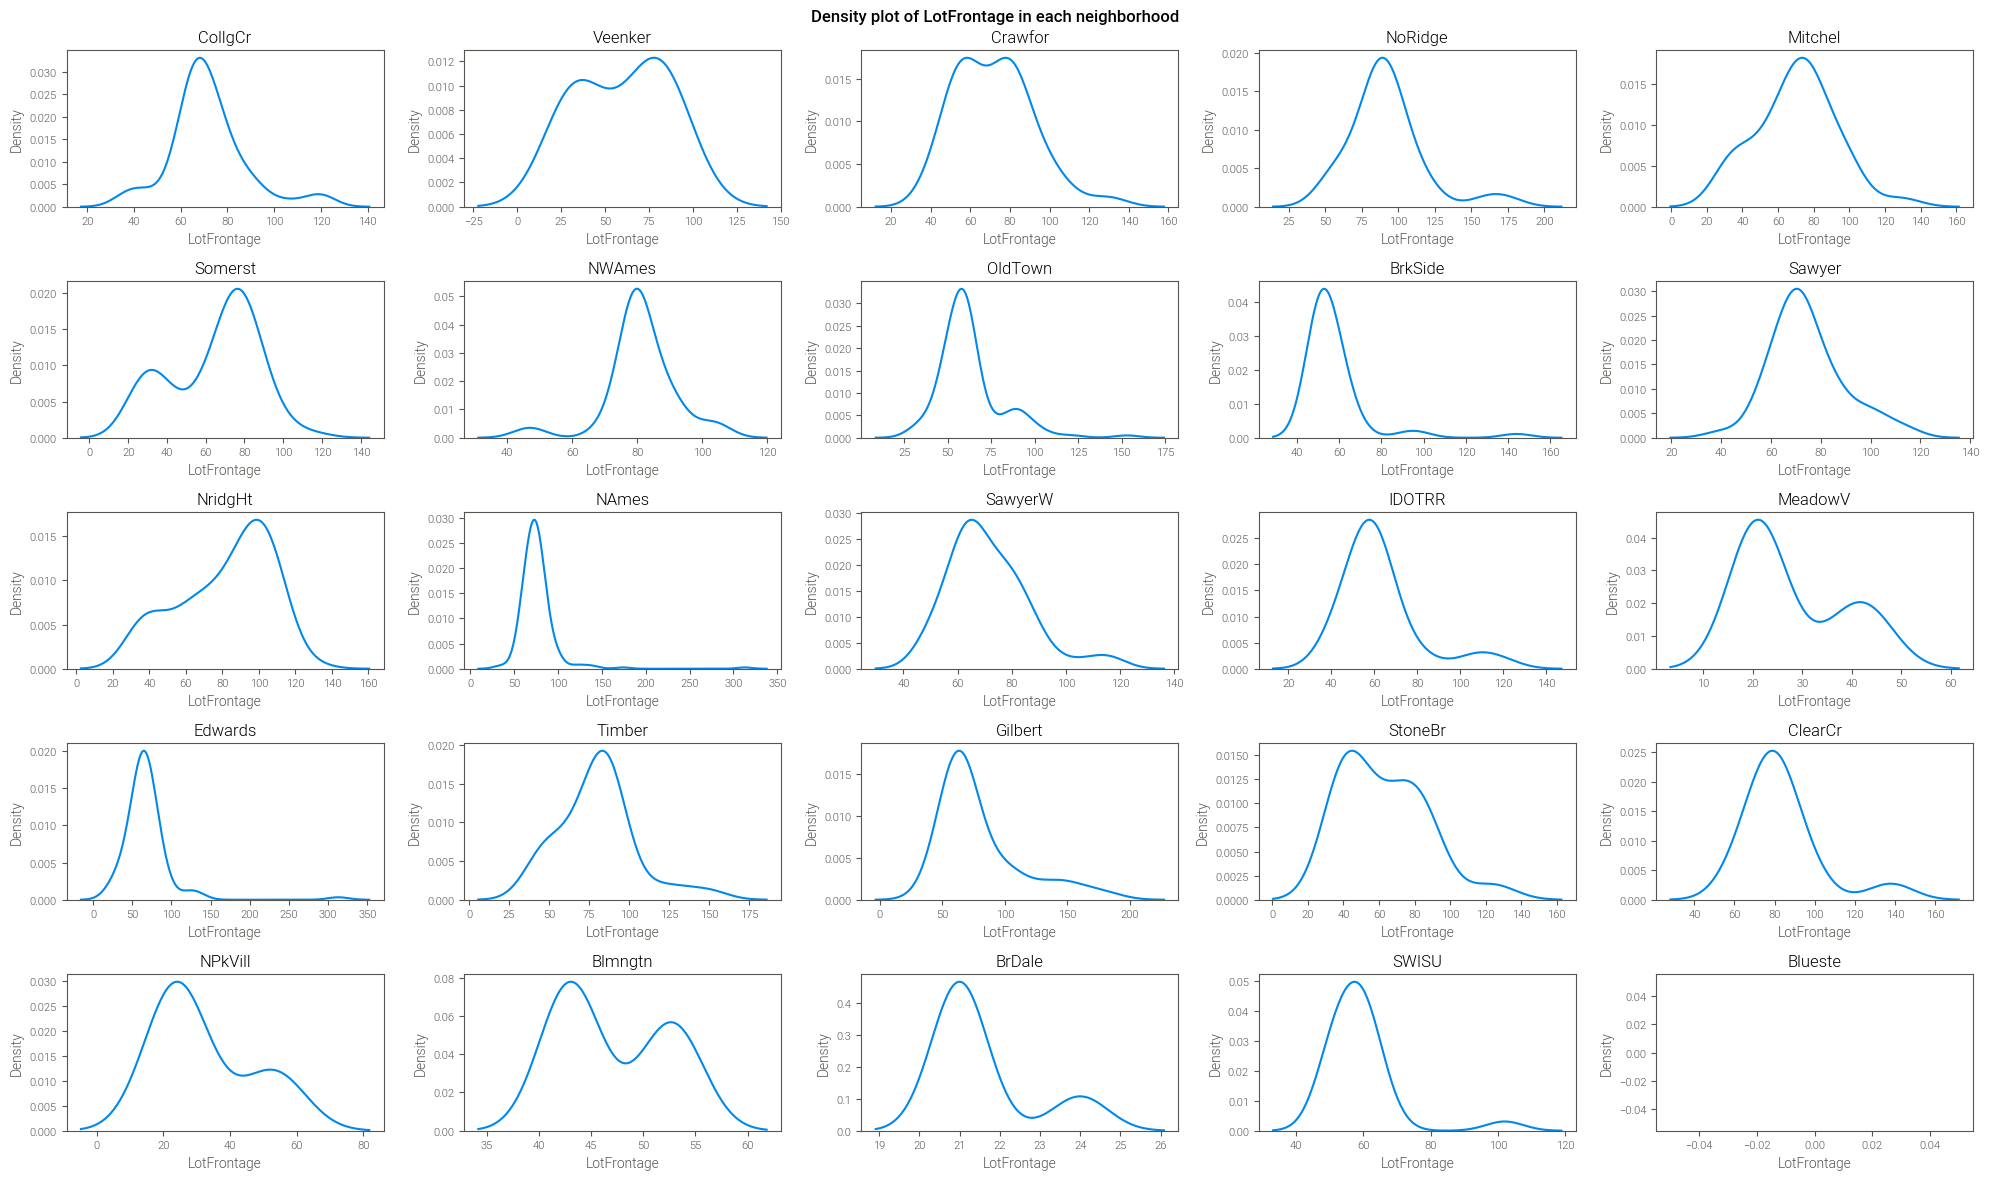

In [9]:
fig,axs = plt.subplots(5,5, figsize=(20,12))
axs = axs.ravel()

for neigh, ax in zip(df['Neighborhood'].unique(), axs):
    fig.suptitle('Density plot of LotFrontage in each neighborhood',fontweight ="bold")
    sns.kdeplot(df[df['Neighborhood'] == neigh]['LotFrontage'], ax=ax)

    ax.set_title(neigh)
    
plt.tight_layout()

In [10]:
m_LotFrontage= df.groupby(['Neighborhood'])["LotFrontage"].agg('median').to_dict()

df["LotFrontage"]= df["LotFrontage"].fillna(df['Neighborhood'].map(m_LotFrontage))

In [11]:
df['Electrical']= df['Electrical'].fillna(df['Electrical'].mode()[0])

In [12]:
change_NA={}

change_NA['MasVnrArea']=change_NA['GarageYrBlt']=0


change_NA['MasVnrType']= 'None'

change_NA['Alley']=change_NA['MasVnrType']=change_NA['BsmtQual']= change_NA['BsmtCond']='Does Not Have'

change_NA['BsmtExposure']=change_NA['BsmtFinType1']=change_NA['BsmtFinType2']='Does Not Have'

change_NA['FireplaceQu']=change_NA['GarageType']='Does Not Have'

change_NA['GarageFinish']=change_NA['GarageQual']=change_NA['GarageCond']='Does Not Have'

change_NA['PoolQC']=change_NA['Fence']=change_NA['MiscFeature']='Does Not Have'



for col in change_NA.keys():
    df.loc[:,col]= df.loc[:,col].fillna(change_NA[col])
    


## Analaysing Data

In [13]:
def Multicollinear_Features():
    corr = df.corr().abs()
    features = []
    correlations = []
    for idx, correlation in corr['SalePrice'].T.iteritems():
        if correlation >= .3 and idx != 'SalePrice':
            features.append(idx)
            correlations.append(correlation)
    corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features})
    Multicollinear_Features = []
    def check_multicollinearity(feature):
        for idx, correlation in corr[feature].T.iteritems():
            if correlation >= .8 and idx != feature and corr['SalePrice'].loc[feature] >= corr['SalePrice'].loc[idx]:
                Multicollinear_Features.append({'Correlations':correlation,'Features':feature,'idx': idx})

    for feature in corr:
        check_multicollinearity(feature)
    if len(Multicollinear_Features) > 0:
        MC_df = pd.DataFrame(Multicollinear_Features)
    else:
        MC_df = pd.DataFrame(columns=['Correlations', 'Features','idx'])
    print('Multicollinear Features')
    MC_df.sort_values(by='Correlations',ascending=False,inplace=True)
    MC_df.reset_index(drop=True,inplace=True)
    display(MC_df)


    corr_price_df.sort_values(by='Correlations',ascending=False,inplace=True)
    corr_price_df.reset_index(drop=True,inplace=True)
    print('Correlations with Price')
    corr_price_df = corr_price_df.loc[~corr_price_df['Features'].isin(MC_df['idx'].to_list())]
    display(corr_price_df)
    return(MC_df,corr_price_df)

MC_df,corr_price_df=Multicollinear_Features()

Multicollinear Features


,Correlations,Features,idx
0,0.882475,GarageCars,GarageArea
1,0.825489,GrLivArea,TotRmsAbvGrd
2,0.819530,TotalBsmtSF,1stFlrSF


Correlations with Price


,Correlations,Features
0,0.790982,OverallQual
1,0.708624,GrLivArea
2,0.640409,GarageCars
4,0.613581,TotalBsmtSF
6,0.560664,FullBath
8,0.522897,YearBuilt
9,0.507101,YearRemodAdd
10,0.472614,MasVnrArea
11,0.466929,Fireplaces
12,0.386420,BsmtFinSF1


In [14]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    removed = []
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included) - set(removed))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature =model.pvalues.idxmax()
            included.remove(worst_feature)
            removed.append(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(df[corr_price_df['Features'].to_list()], df['SalePrice'], verbose=True)
print('resulting features:')
#result = result[:-1]
result =corr_price_df.loc[corr_price_df['Features'].isin(result)]['Features'].to_list()
print(result)

Add  OverallQual                    with p-value 2.18568e-313
Add  GrLivArea                      with p-value 1.87051e-87


C:\Users\EngMA\AppData\Local\Temp\ipykernel_20372\3075878133.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_20372\3075878133.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_20372\3075878133.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  BsmtFinSF1                     with p-value 3.42354e-39
Add  GarageCars                     with p-value 4.30246e-28
Add  YearRemodAdd                   with p-value 4.31794e-11
Add  TotalBsmtSF                    with p-value 1.24316e-10
Add  MasVnrArea                     with p-value 2.97268e-07
Add  Fireplaces                     with p-value 3.44696e-06


C:\Users\EngMA\AppData\Local\Temp\ipykernel_20372\3075878133.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_20372\3075878133.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_20372\3075878133.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_20372\3075878133.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version.

Add  WoodDeckSF                     with p-value 3.68075e-05
Add  YearBuilt                      with p-value 0.00161263
resulting features:
['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'WoodDeckSF']


C:\Users\EngMA\AppData\Local\Temp\ipykernel_20372\3075878133.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\EngMA\AppData\Local\Temp\ipykernel_20372\3075878133.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)



 mu = 180921.20 and sigma = 79415.29



C:\Users\EngMA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


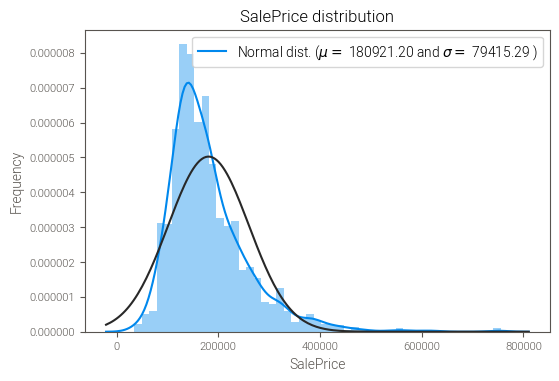

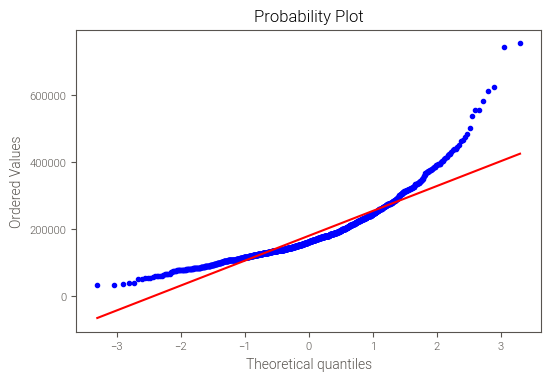

In [15]:


sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

## Find outlier

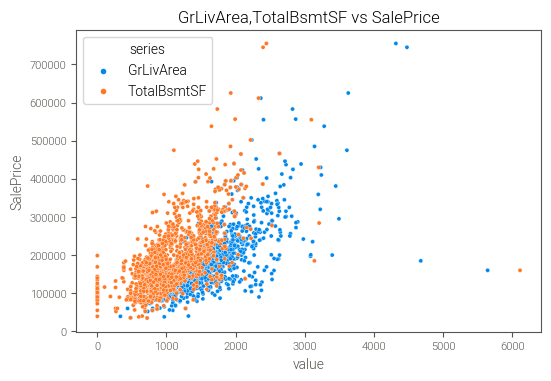

In [16]:
sns.scatterplot(x='value', hue='series', y='SalePrice',
                     data=df.melt(value_vars=['GrLivArea','TotalBsmtSF'], 
                                    id_vars='SalePrice',
                                    var_name='series'))
plt.title('GrLivArea,TotalBsmtSF vs SalePrice');

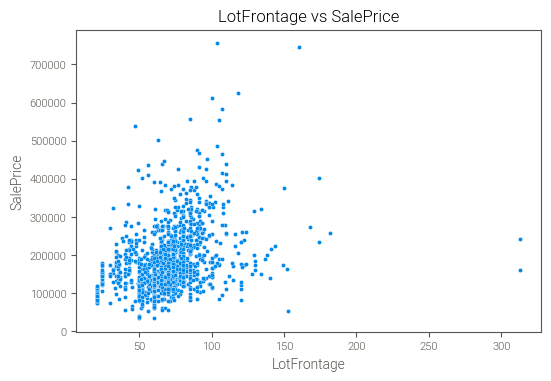

In [17]:
sns.scatterplot(x='LotFrontage', y='SalePrice', data=df)
plt.title('LotFrontage vs SalePrice');

In [18]:
#Deleting outliers
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

df = df.drop(df[(df['TotalBsmtSF']>6000)].index)

df = df.drop(df[(df['LotFrontage']>300)].index)

df = df.drop(df[(df['KitchenAbvGr']==0)].index)

df = df.drop(df[(df['Fireplaces']==3)].index)


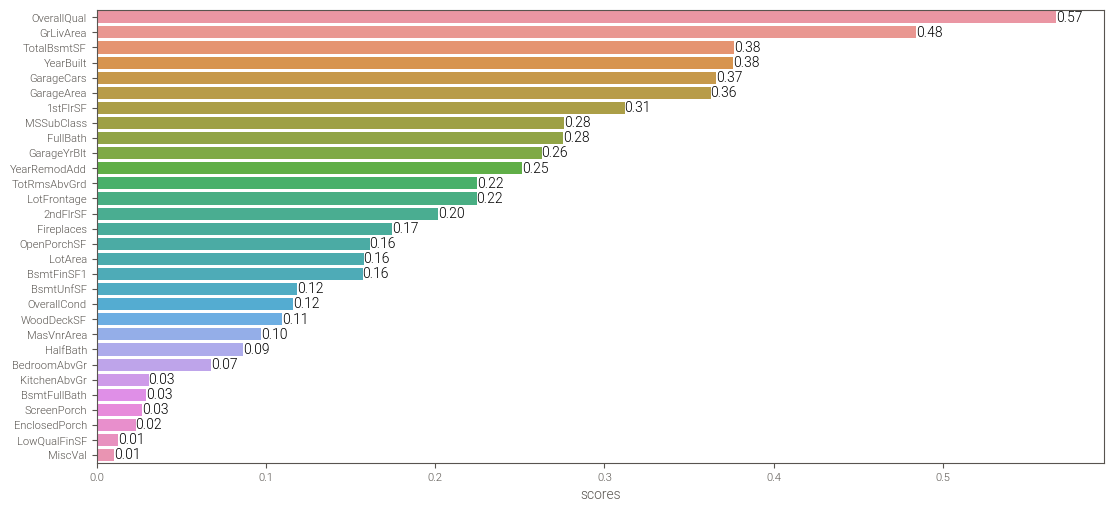

In [19]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:30], y=df_mi_score.index[:30], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

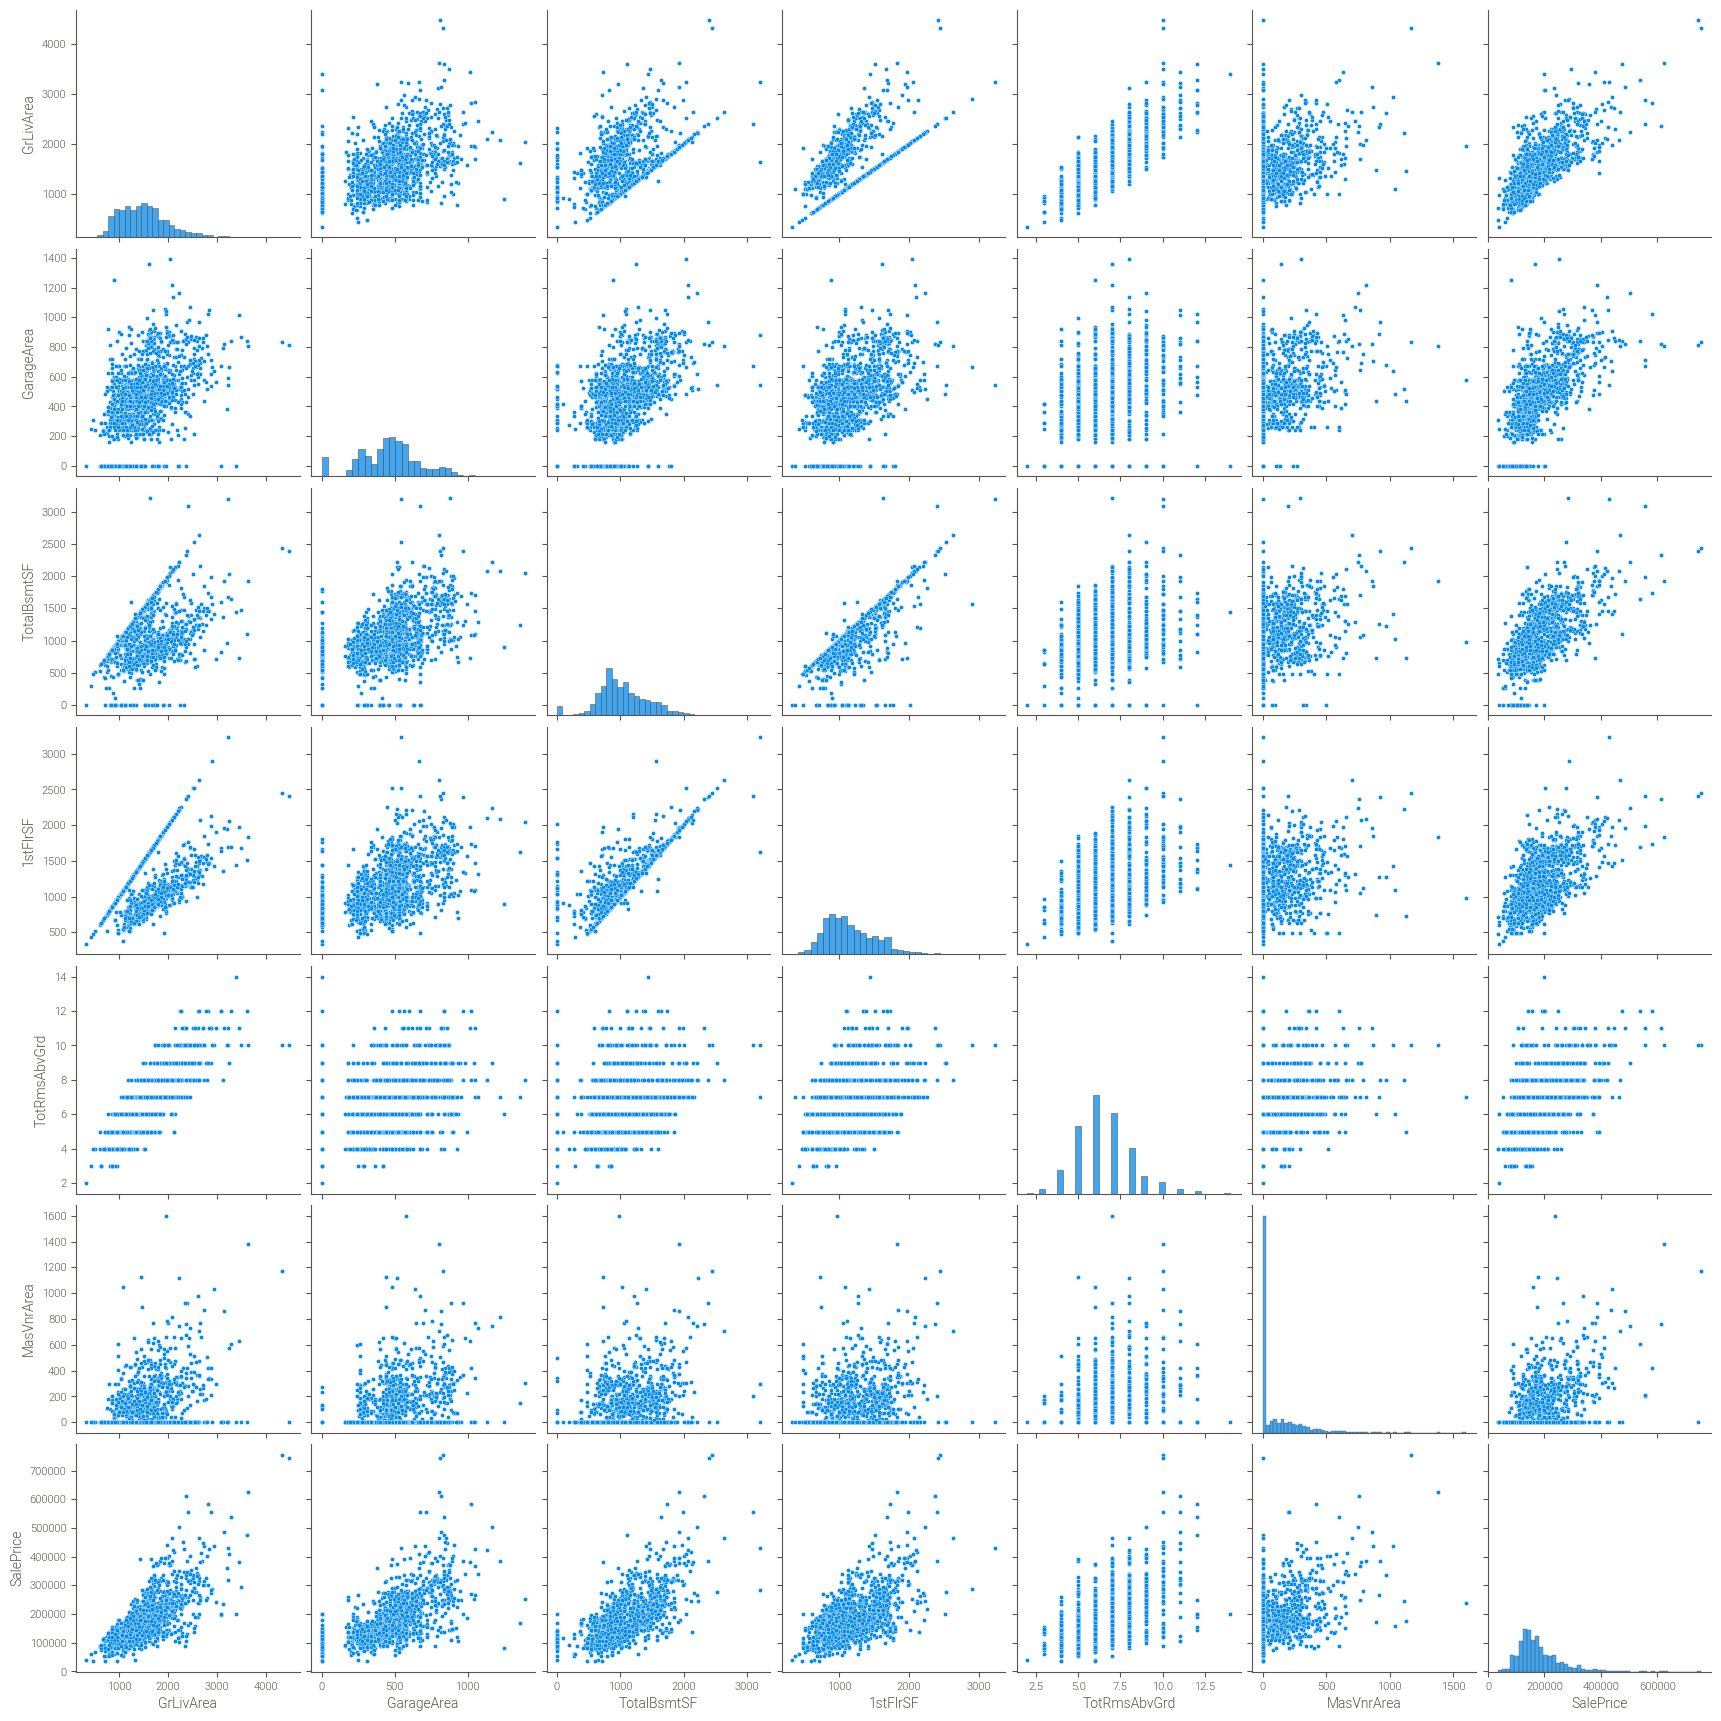

In [20]:
sns.pairplot(df[["GrLivArea", "GarageArea", "TotalBsmtSF", "1stFlrSF", "TotRmsAbvGrd", "MasVnrArea", "SalePrice"]])

In [21]:
# df.info()

In [22]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,56.928375,69.814394,10442.831956,6.090220,5.575069,1971.216253,1984.796143,102.318871,437.274793,46.276860,...,93.816804,46.210744,22.075069,3.428375,14.915978,2.443526,43.728650,6.307851,2007.816116,180668.523416
std,42.370332,20.511880,9868.316712,1.375472,1.114041,30.239568,20.665157,179.347099,432.348161,160.618023,...,125.014699,65.304427,61.265602,29.396943,55.615779,38.288545,497.478278,2.693816,1.328763,79371.794982
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7526.250000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,70.000000,9458.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,380.500000,0.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162950.000000
75%,70.000000,80.000000,11560.750000,7.000000,6.000000,2000.000000,2004.000000,163.250000,706.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
# df.columns

In [24]:
nominal_cols = ["LandContour", "LotConfig",
                "Neighborhood","Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", 
                "Exterior2nd", "MasVnrType", "Foundation", "Heating",
                "MiscFeature", "MoSold", "YrSold",  "YearBuilt", "YearRemodAdd",
                "GarageYrBlt", "Street", "Alley", "LotShape", "CentralAir",
                "Fence", "PavedDrive", "LandSlope", "Electrical"]


ordinal_cols = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual",
                "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", 
                "GarageQual", "GarageCond", "Functional","PoolQC","GarageFinish", "GarageType",
               "SaleType", "SaleCondition","MSSubClass", "MSZoning"]


num_cols = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", 
            "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr",
            "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", 'EnclosedPorch', '3SsnPorch', 
            'ScreenPorch', "MiscVal", 'PoolArea']


In [25]:
df['Street'].value_counts()

Pave    1446
Grvl       6
Name: Street, dtype: int64

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

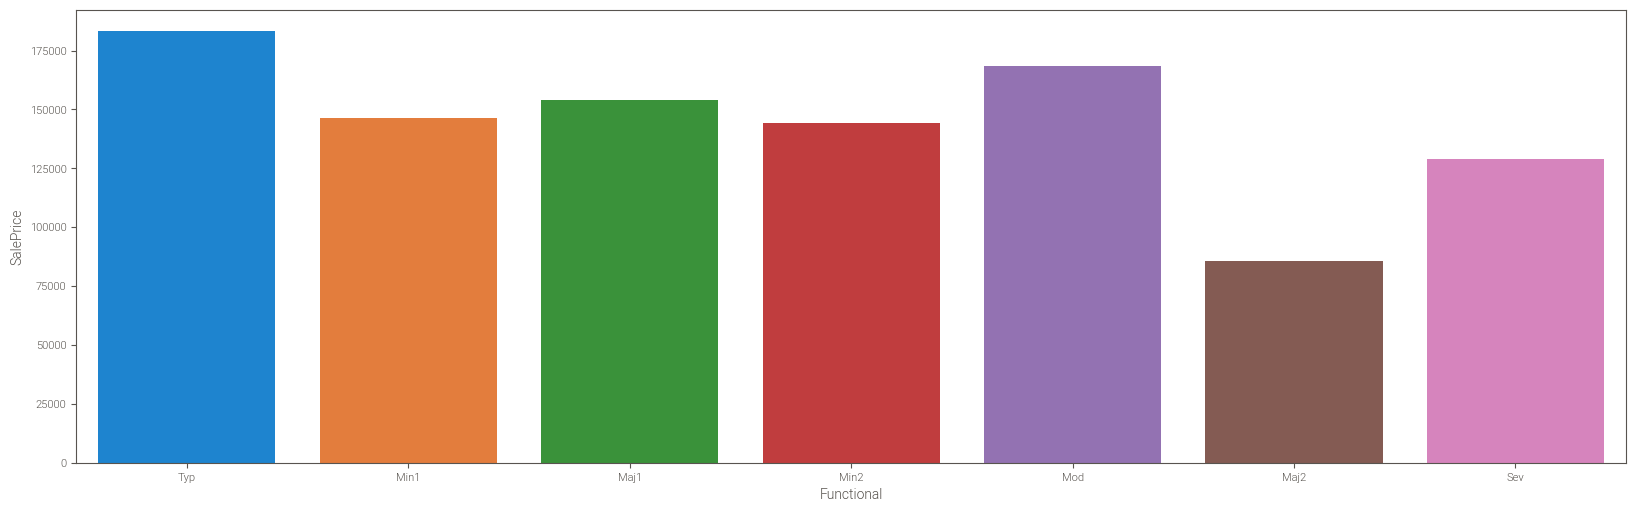

In [26]:
fig = plt.subplots(figsize=(20,6))

sns.barplot(x='Functional', y='SalePrice', data=df, ci=None)

In [27]:
df[nominal_cols] = df[nominal_cols].astype("object")


<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

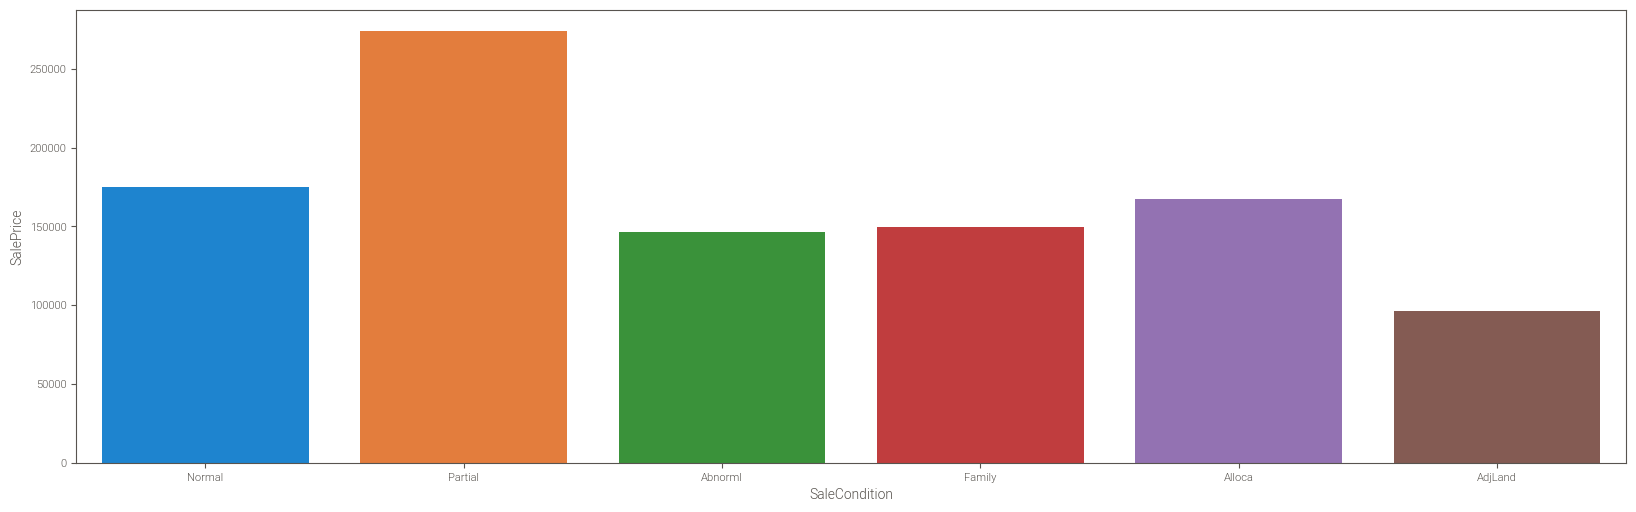

In [28]:
df["SaleCondition"].value_counts()

plot_order = df.groupby('SaleCondition')['SalePrice'].sum().sort_values(ascending=False).index.values

fig = plt.subplots(figsize=(20,6))

sns.barplot(x="SaleCondition", y='SalePrice', ci=None, data=df, order = plot_order)

In [29]:
df['MSZoning'].value_counts()

RL         1143
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [30]:
utilities_dict = {""}

Sale_type_dict= {'Oth':0, 'ConLD':1, 'COD':2, 'ConLw':3, 'WD':4, 'ConLI':4, 'CWD':5, 'Con':6, 'New':7}
Sale_Cond_dict= {'AdjLand':0, 'Abnorml':1, 'Family':2, 'Alloca':3, 'Normal':4, 'Partial':5}


grage_type_dict= {"Does Not Have":0,  'CarPort':1, 'Detchd':2, '2Types':3, 'Basment':4, 'Attchd':5, 'BuiltIn':6 }
alley_dict= {'Grvl':0, 'Pave':1, 'Does Not Have':2}
LotShape_dict = {"IR3":0, 'IR2':1, 'IR1':2, 'Reg':3}
centeral_Air_dict= {"N":0, "Y":1}
Street_dict = {"Grvl": 0, "Pave": 1}

MSSubClass_dict= {30:0,180:1,45:2,190:3,90:4,160:5,50:6,85:7,40:8,80:9,70:10,20:11,75:12,120:13,60:14} 
MSZoning_dict= {'C (all)':0, 'RM':2,'RH':3,'RL':4,'FV':5}


fence_dict= {'Does Not Have':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}
paved_drive_dict={'N':0, 'P':1, 'Y':2}
land_slope_dict={'Sev':0, 'Mod':1, 'Gtl':2}
grage_finish_dict={'Does Not Have':0, 'Unf':1, 'RFn':2, 'Fin':3}
electrical_dict= {'Mix':0, 'FuseP':1, 'FuseF':2,'FuseA':3, 'SBrkr':4}


exterior_quality_dict = {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}
exterior_condition_dict = {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}
basement_quality_dict = {"Does Not Have": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
basement_condition_dict = {"Does Not Have": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
basement_exposure_dict = {"Does Not Have": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}
basement_fin_type1_dict = {"Does Not Have": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
basement_fin_type2_dict = {"Does Not Have": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
heating_quality_dict = {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}
kitchen_quality_dict = {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}
fireplace_quality_dict = {"Does Not Have": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
garage_quality_dict = {"Does Not Have": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
garage_condition_dict= {"Does Not Have": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
pool_quality_dict = {"Does Not Have": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}
functional_dict = {"Sal": 0, "Sev": 1, "Maj2": 2, "Maj1": 3, "Mod": 4, "Min2": 5, "Min1": 6, "Typ": 7}

In [31]:
df["Street"] = df["Street"].map(Street_dict)
df["Alley"] = df["Alley"].map(alley_dict)
df["LotShape"] = df["LotShape"].map(LotShape_dict)
df["CentralAir"] = df["CentralAir"].map(centeral_Air_dict)
df["GarageType"] = df["GarageType"].map(grage_type_dict)

df["Fence"] = df["Fence"].map(fence_dict)
df["PavedDrive"] = df["PavedDrive"].map(paved_drive_dict)
df["LandSlope"] = df["LandSlope"].map(land_slope_dict)
df["GarageFinish"] = df["GarageFinish"].map(grage_finish_dict)
df["Electrical"] = df["Electrical"].map(electrical_dict)

df["SaleCondition"]=df["SaleCondition"].map(Sale_Cond_dict)
df["SaleType"]=df["SaleType"].map(Sale_type_dict)



df['MSSubClass']=df['MSSubClass'].map(MSSubClass_dict)
df['MSZoning']=df['MSZoning'].map(MSZoning_dict)


df["ExterQual"] = df["ExterQual"].map(exterior_quality_dict)
df["ExterCond"] = df["ExterCond"].map(exterior_condition_dict)
df["BsmtQual"] = df["BsmtQual"].map(basement_quality_dict)
df["BsmtCond"] = df["BsmtCond"].map(basement_condition_dict)
df["BsmtExposure"] = df["BsmtExposure"].map(basement_exposure_dict)
df["BsmtFinType1"] = df["BsmtFinType1"].map(basement_fin_type1_dict)
df["BsmtFinType2"] = df["BsmtFinType2"].map(basement_fin_type2_dict)
df["HeatingQC"] = df["HeatingQC"].map(heating_quality_dict)
df["KitchenQual"] = df["KitchenQual"].map(kitchen_quality_dict)
df["FireplaceQu"] = df["FireplaceQu"].map(fireplace_quality_dict)
df["GarageQual"]= df["GarageQual"].map(garage_quality_dict)
df["GarageCond"]= df["GarageCond"].map(garage_condition_dict)
df["PoolQC"]= df["PoolQC"].map(pool_quality_dict)
df["Functional"]=df["Functional"].map(functional_dict)

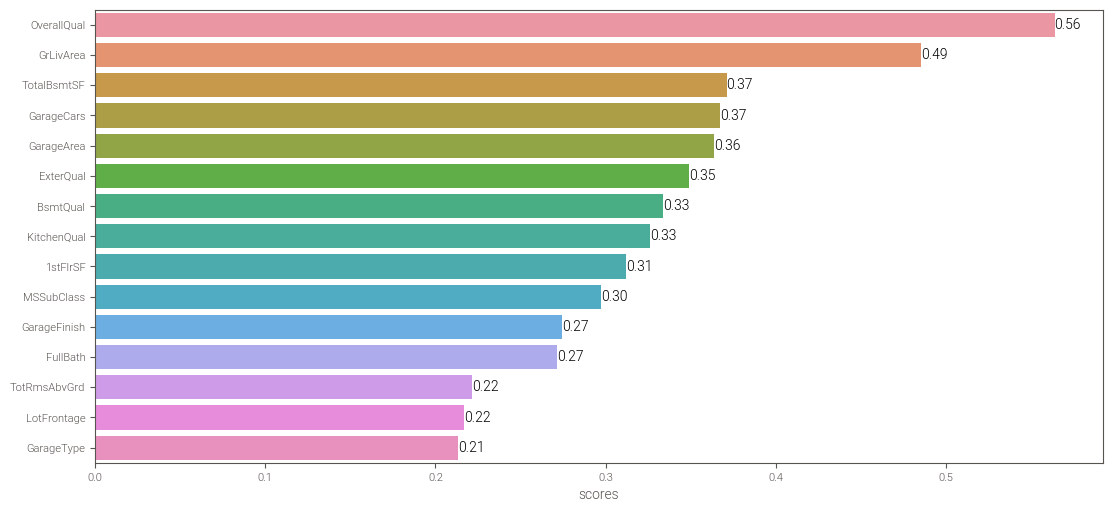

In [32]:


new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:15], y=df_mi_score.index[:15], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

In [33]:
square_footage_cols = ["GrLivArea", "TotalBsmtSF", "GarageArea"]
df[square_footage_cols]

,GrLivArea,TotalBsmtSF,GarageArea
0,1710,856,548
1,1262,1262,460
2,1786,920,608
3,1717,756,642
4,2198,1145,836
...,...,...,...
1455,1647,953,460
1456,2073,1542,500
1457,2340,1152,252
1458,1078,1078,240


In [34]:
df["AggSF"] = df["GrLivArea"] + df["TotalBsmtSF"] + df["GarageArea"]

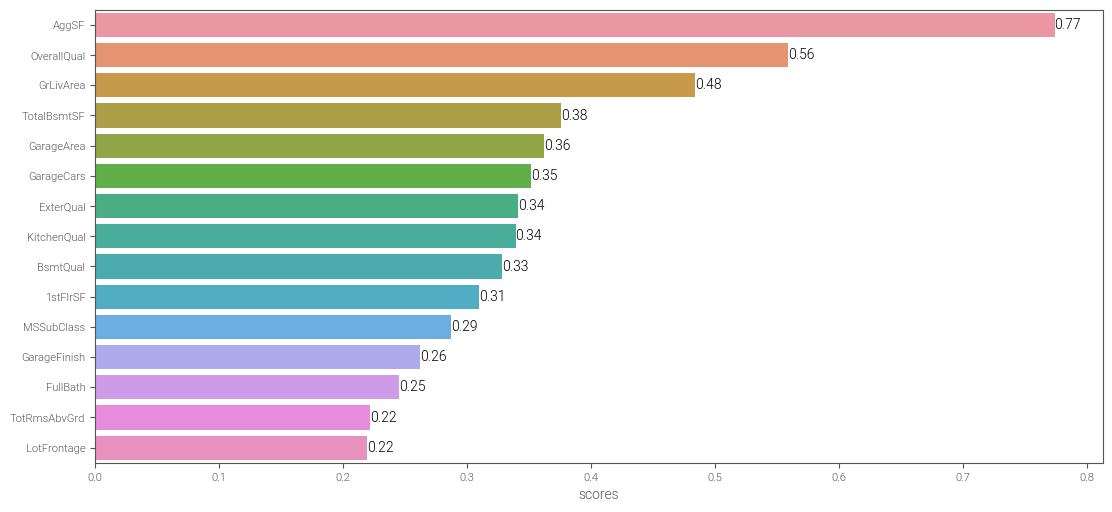

In [35]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:15], y=df_mi_score.index[:15], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

In [36]:

bath_cols = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']


corr_matrix = df.corr(method='pearson')
print('mi scores with SalePrice\n', df_mi_score[bath_cols].sort_values(ascending=False))
#pearson correlation
print('\npearson correlation coefficient\n', corr_matrix.loc[bath_cols, 'SalePrice'].sort_values(ascending=False))

mi scores with SalePrice
 FullBath        0.245268
HalfBath        0.078042
BsmtHalfBath    0.022883
BsmtFullBath    0.018237
Name: scores, dtype: float64

pearson correlation coefficient
 FullBath        0.562510
HalfBath        0.285430
BsmtFullBath    0.225573
BsmtHalfBath   -0.012570
Name: SalePrice, dtype: float64


In [37]:
df['bath_score'] = df.apply(lambda x: 
                              (2*x['FullBath'])+(1*x['HalfBath'])+(0.5*x['BsmtFullBath'])+(0.25*x['BsmtHalfBath']), axis=1)

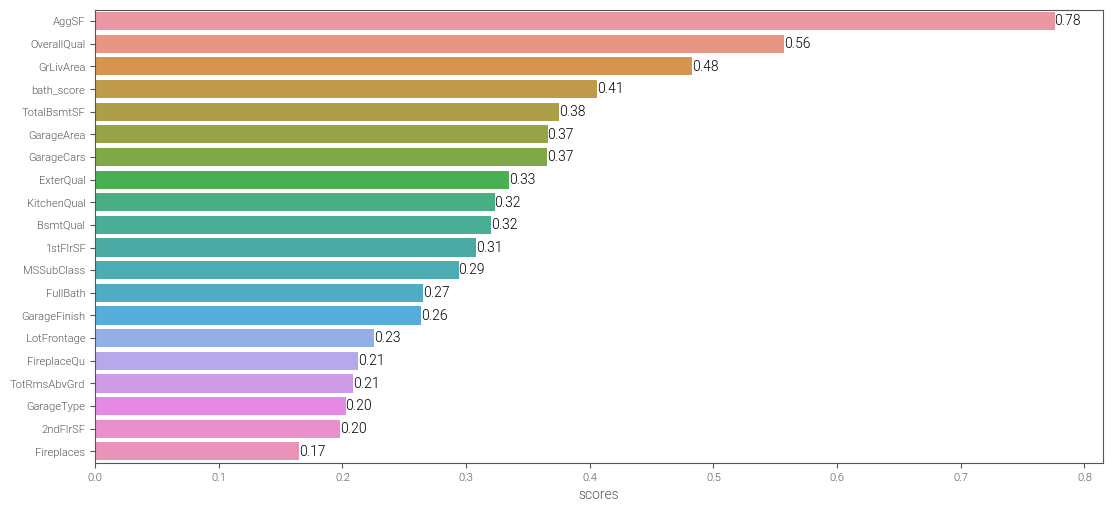

In [38]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:20], y=df_mi_score.index[:20], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

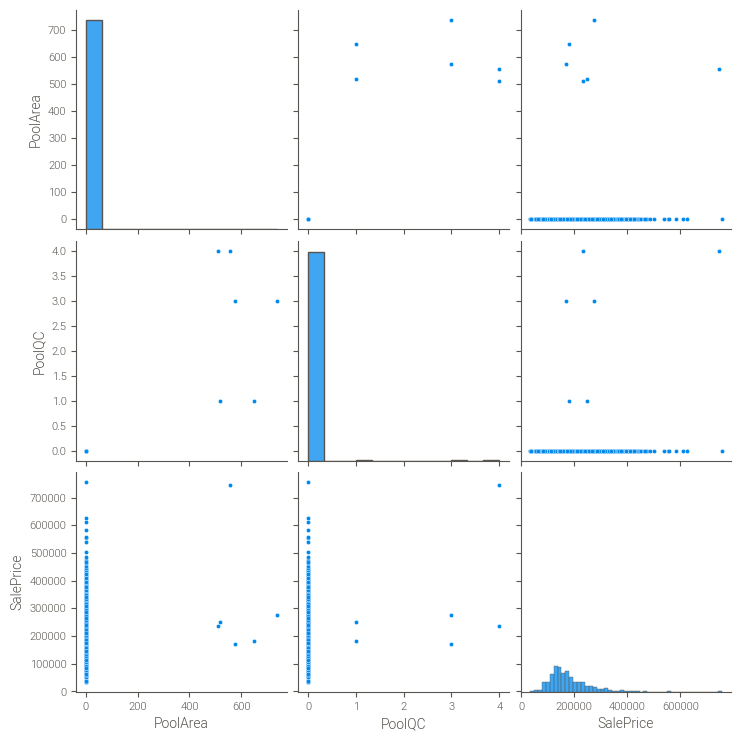

In [39]:
sns.pairplot(df[["PoolArea", "PoolQC", "SalePrice"]])

In [40]:
df["pool"]= df['PoolArea'].apply(lambda x: (0,1)[x>0])

<AxesSubplot:xlabel='pool', ylabel='SalePrice'>

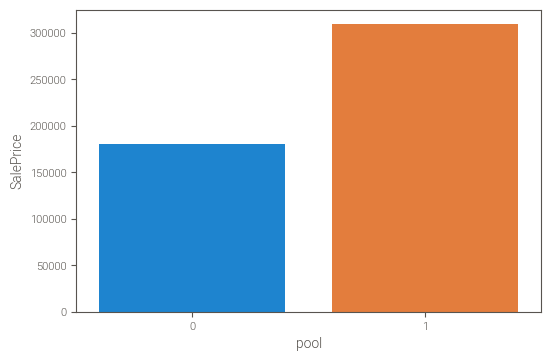

In [41]:
sns.barplot(y='SalePrice', x='pool', data=df, ci=None)

In [42]:
df['pool_score']=df.apply(lambda x:x['pool']*x['PoolQC'], axis=1)

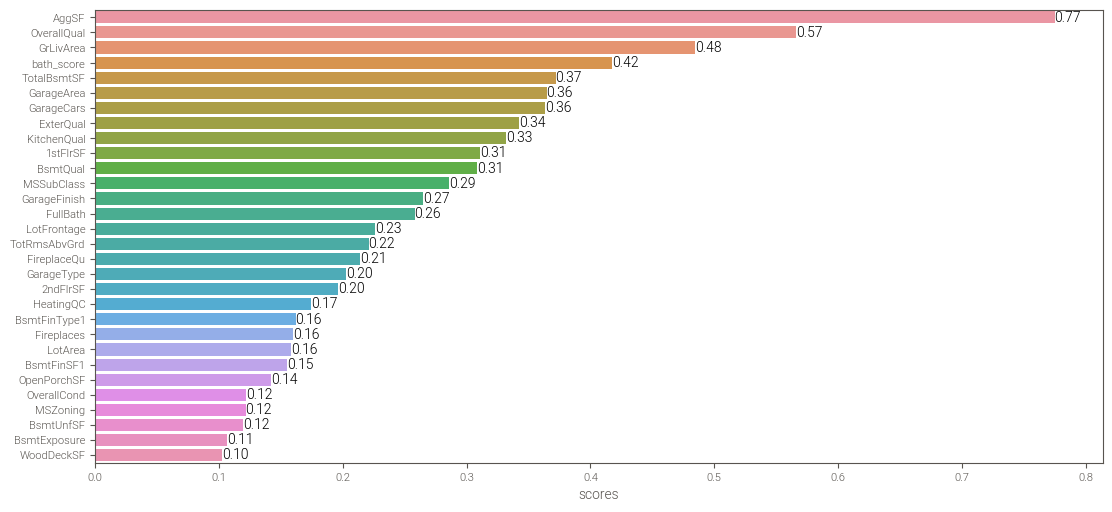

In [43]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:30], y=df_mi_score.index[:30], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

In [44]:
df[['GarageType' ,'GarageCars','GarageQual','GarageCond', 'GarageFinish'] ]

,GarageType,GarageCars,GarageQual,GarageCond,GarageFinish
0,5,2,3,3,2
1,5,2,3,3,2
2,5,2,3,3,2
3,2,3,3,3,1
4,5,3,3,3,2
...,...,...,...,...,...
1455,5,2,3,3,2
1456,5,2,3,3,1
1457,5,1,3,3,2
1458,5,1,3,3,1


In [45]:

garage_cols = ['GarageType' ,'GarageCars','GarageQual','GarageCond', 'GarageFinish']


corr_matrix = df.corr(method='pearson')
print('mi scores with SalePrice\n', df_mi_score[garage_cols].sort_values(ascending=False))
#pearson correlation
print('\npearson correlation coefficient\n', corr_matrix.loc[garage_cols, 'SalePrice'].sort_values(ascending=False))

mi scores with SalePrice
 GarageCars      0.363034
GarageFinish    0.265146
GarageType      0.202656
GarageQual      0.072415
GarageCond      0.070035
Name: scores, dtype: float64

pearson correlation coefficient
 GarageCars      0.641248
GarageFinish    0.548965
GarageType      0.489088
GarageQual      0.273555
GarageCond      0.262804
Name: SalePrice, dtype: float64


In [46]:
df['garage_score'] = df.apply(lambda x: 
                              (2*x['GarageCars'])+(1.5*x['GarageFinish'])+(1*x['GarageType'])+(0.5*x['GarageQual']), axis=1)

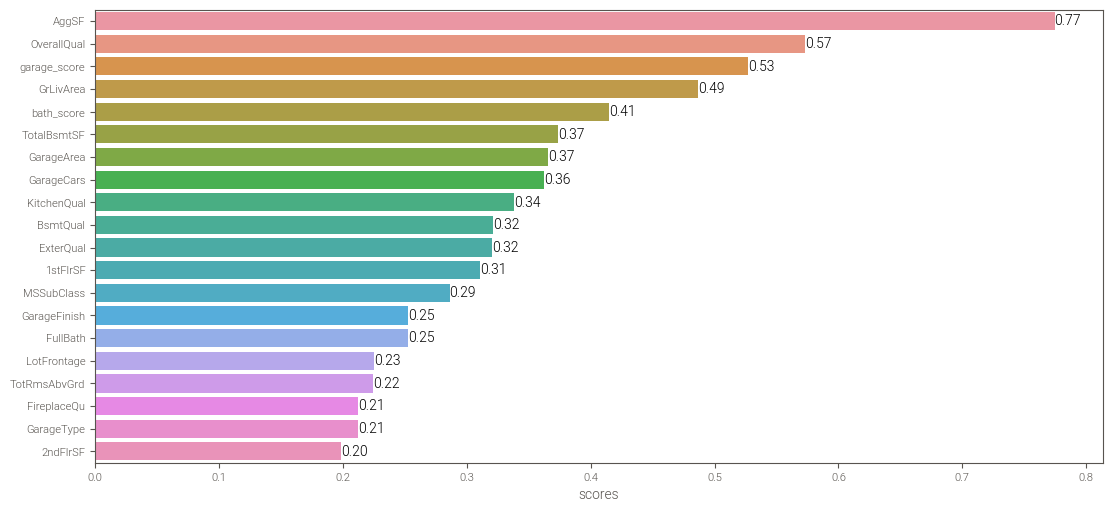

In [47]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:20], y=df_mi_score.index[:20], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

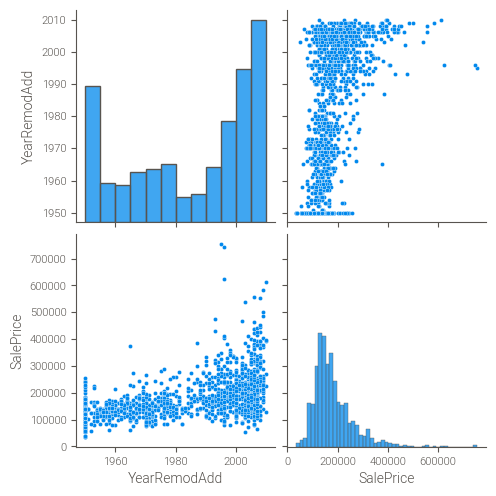

In [48]:
sns.pairplot(df[["YearRemodAdd", "SalePrice"]])

In [49]:
df["YearRemodAdd"].value_counts()

1950    178
2006     97
2007     75
2005     73
2004     61
       ... 
2010      6
1983      5
1986      5
1952      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

In [50]:
df["years_model"]=df["YrSold"]-df["YearRemodAdd"]

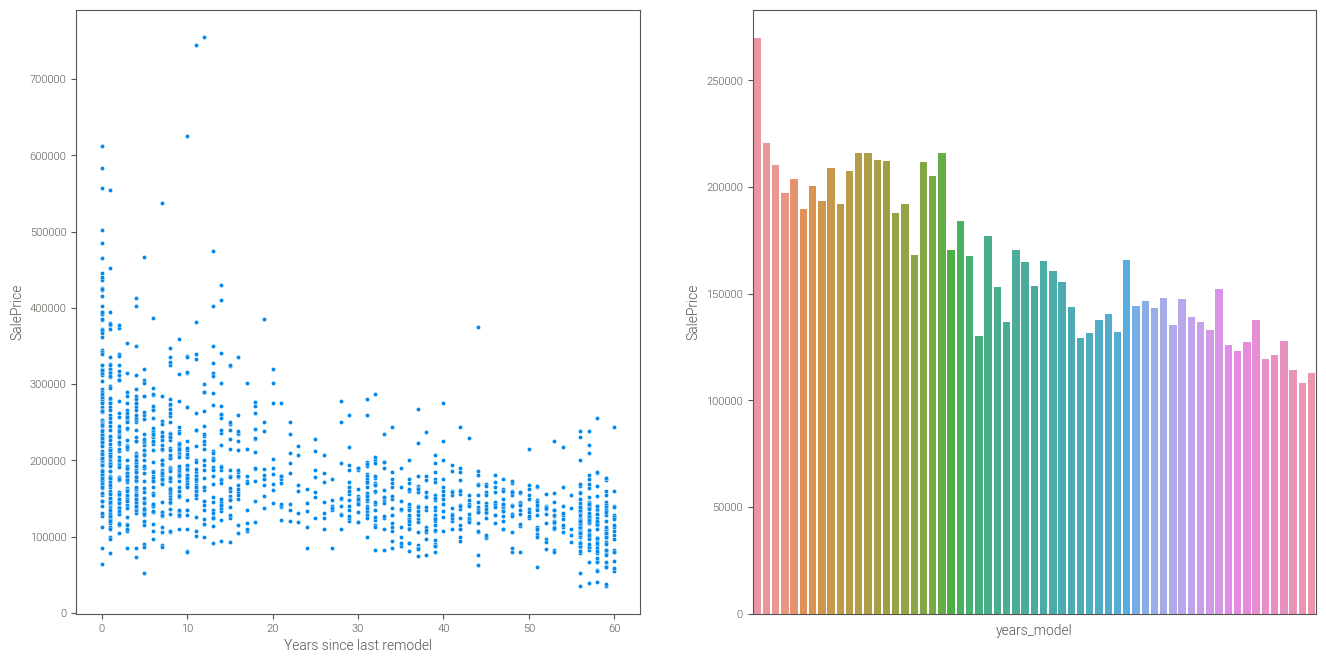

In [51]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,8))
#scatterplot
sns.scatterplot(x='years_model', y='SalePrice', data=df, ax=ax1)
ax1.set_xlabel('Years since last remodel')
#barplot
sns.barplot(x='years_model', y='SalePrice', data=df, ci=None, ax=ax2)

ax2.set_xticks([]);

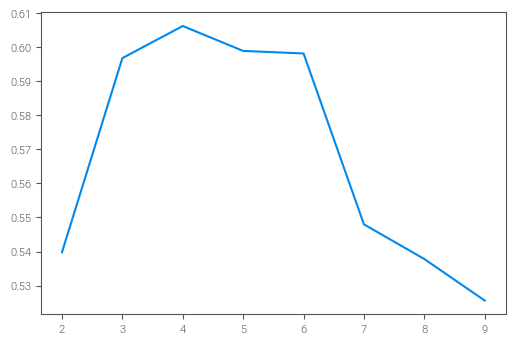

In [52]:


trail= df.copy()
f=["years_model","YearBuilt"]
x=trail.loc[:,f]
x=(x-x.mean(axis=0))/x.std(axis=0)

s=[]

for n in range(2,10):
    kmeans= KMeans(n_clusters=n, random_state=0)
    kmeans.fit(x)
    s.append(silhouette_score(x,kmeans.labels_))
plt.plot(range(2,10),s,'-')

In [53]:
f=['YearBuilt']
kmeans= KMeans(n_clusters=4, random_state=0)
kmeans.fit(df[f])
df['YrGroup']=kmeans.predict(df[f])



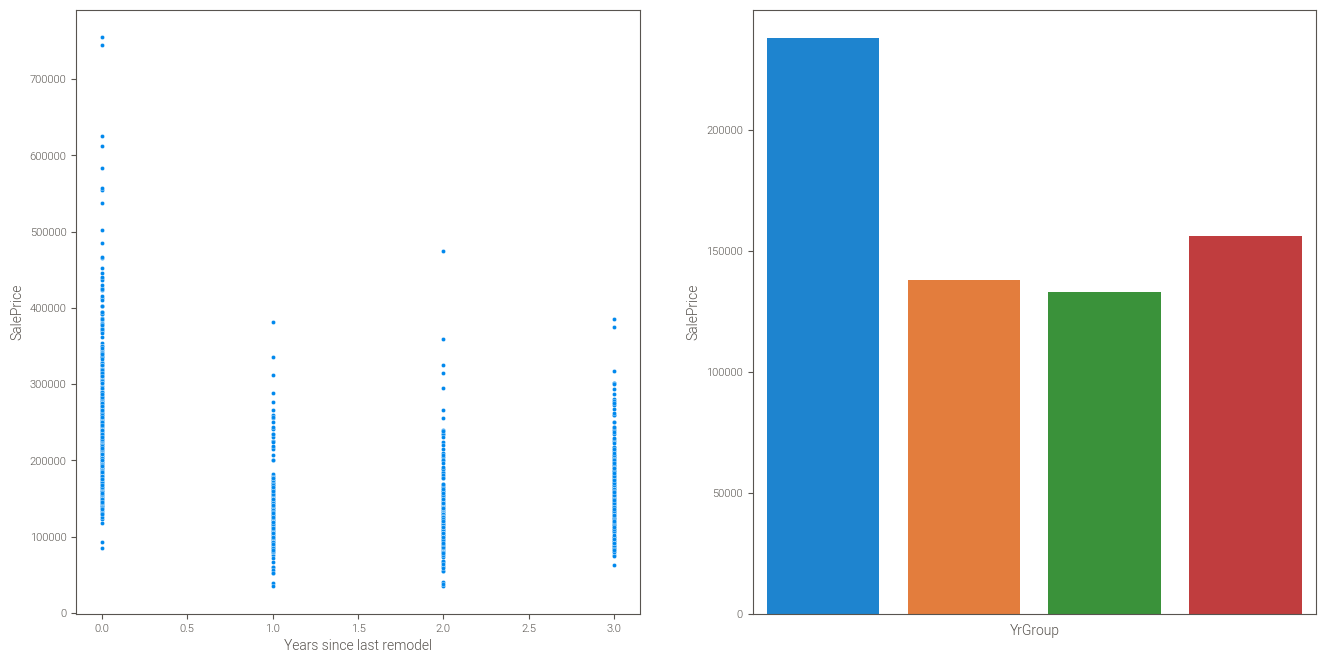

In [54]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,8))
#scatterplot
sns.scatterplot(x='YrGroup', y='SalePrice', data=df, ax=ax1)
ax1.set_xlabel('Years since last remodel')
#barplot
sns.barplot(x='YrGroup', y='SalePrice', data=df, ci=None, ax=ax2)

ax2.set_xticks([]);

In [55]:
df['YrGroup']=df['YrGroup'].astype('int64')

In [56]:
df[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']]

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,0,61,0,0,0
1,298,0,0,0,0
2,0,42,0,0,0
3,0,35,272,0,0
4,192,84,0,0,0
...,...,...,...,...,...
1455,0,40,0,0,0
1456,349,0,0,0,0
1457,0,60,0,0,0
1458,366,0,112,0,0


In [57]:
porch_cols = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
#mi scores
print('mi scores with SalePrice\n', df_mi_score[porch_cols].sort_values(ascending=False))
#pearson correlation
print('\npearson correlation coefficient\n', corr_matrix.loc[porch_cols, 'SalePrice'].sort_values(ascending=False))

mi scores with SalePrice
 OpenPorchSF      0.156537
WoodDeckSF       0.103012
EnclosedPorch    0.032227
ScreenPorch      0.013869
3SsnPorch        0.000000
Name: scores, dtype: float64

pearson correlation coefficient
 WoodDeckSF       0.324033
OpenPorchSF      0.318650
ScreenPorch      0.112389
3SsnPorch        0.045119
EnclosedPorch   -0.127945
Name: SalePrice, dtype: float64


In [58]:
df['porch_score']= df[porch_cols].sum(axis=1) 

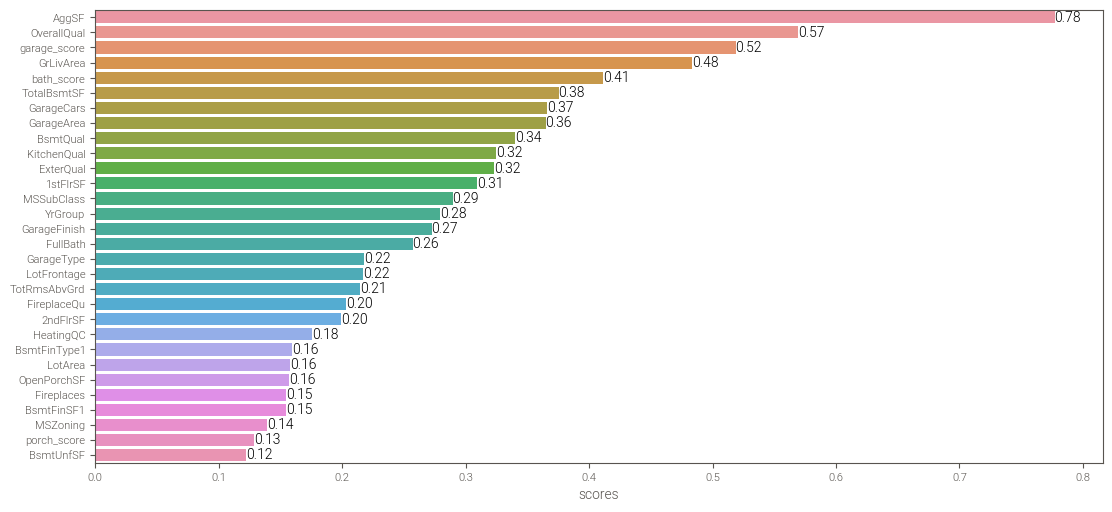

In [59]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:30], y=df_mi_score.index[:30], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

In [60]:
df[['KitchenAbvGr', 'KitchenQual']].value_counts()

KitchenAbvGr  KitchenQual
1             2              673
              3              582
              4               96
2             2               57
1             1               34
2             1                5
              3                3
3             2                2
dtype: int64

In [61]:
df['Kitchen_score']= df['KitchenAbvGr'] *df['KitchenQual']

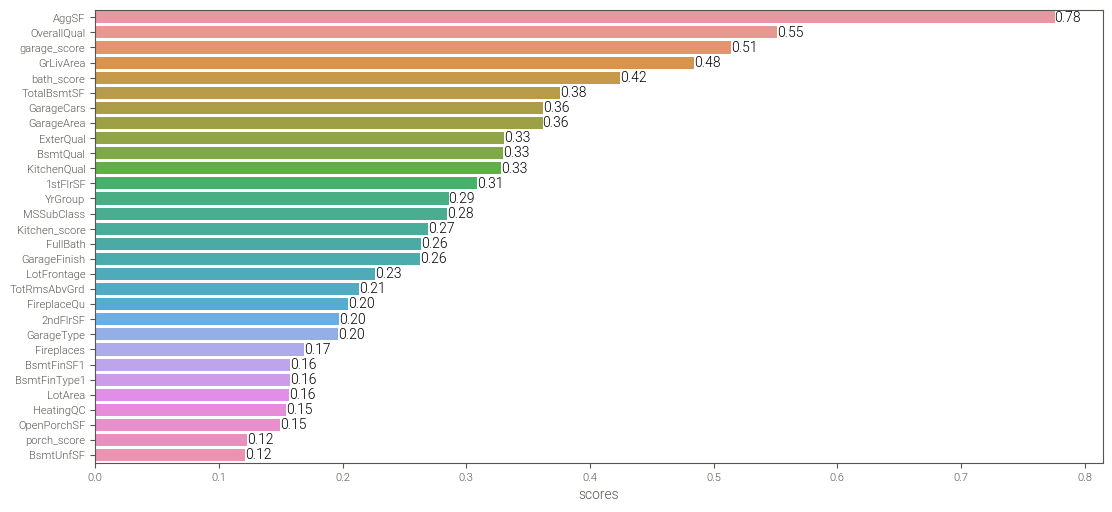

In [62]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:30], y=df_mi_score.index[:30], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

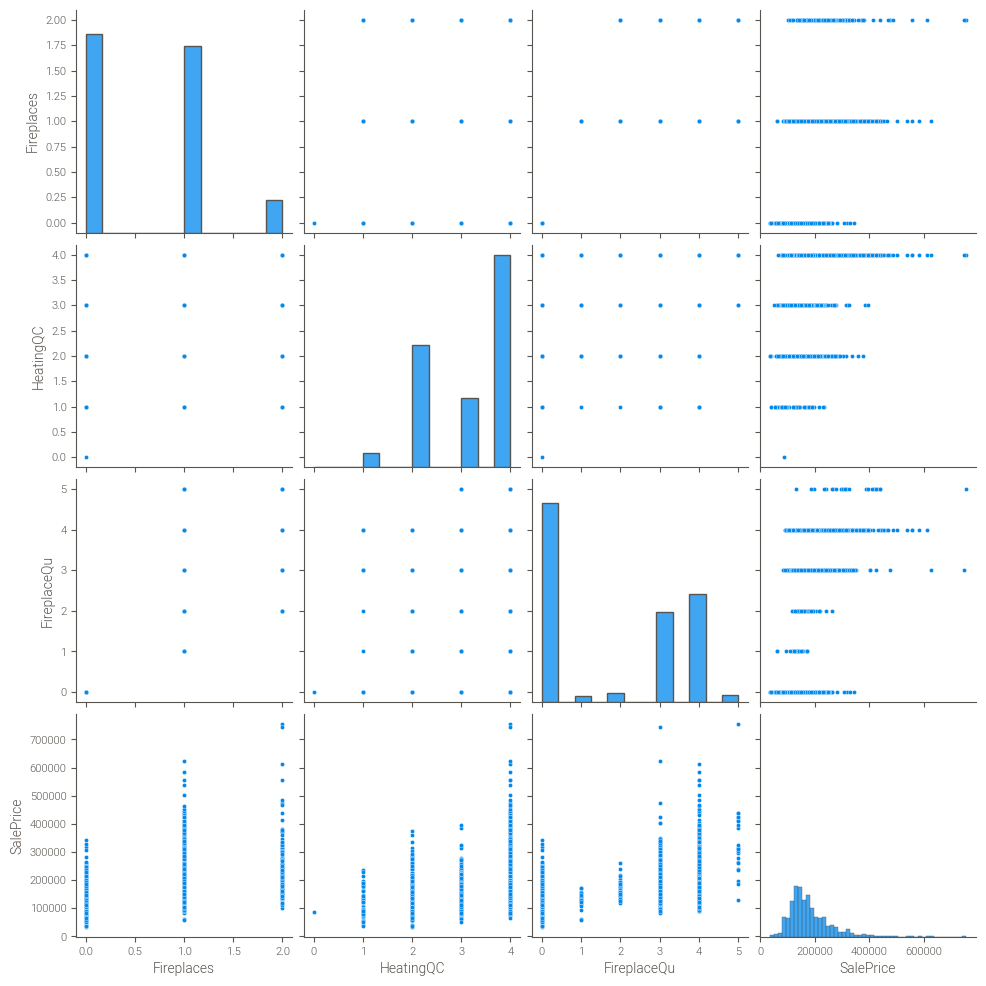

In [63]:
sns.pairplot(df[['Fireplaces', 'HeatingQC','FireplaceQu', 'Heating', 'SalePrice']])

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

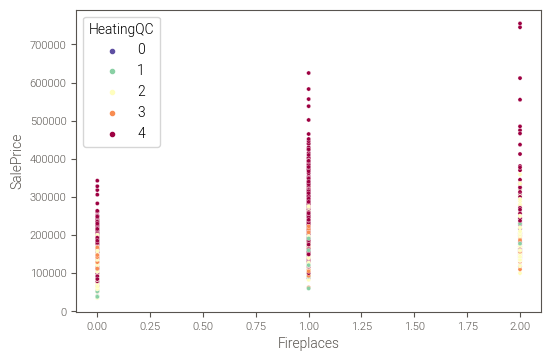

In [64]:
sns.scatterplot(x='Fireplaces', y='SalePrice', data=df, hue='HeatingQC', 
                palette='Spectral_r')

In [65]:
df[['Fireplaces','HeatingQC']].value_counts()

Fireplaces  HeatingQC
1           4            389
0           4            287
            2            243
1           2            144
0           3            129
1           3             99
2           4             60
            2             39
0           1             29
1           1             16
2           3             12
            1              4
0           0              1
dtype: int64

In [66]:
df['heat_fireplace_fQc']= df['HeatingQC']*df['Fireplaces']*df['FireplaceQu']

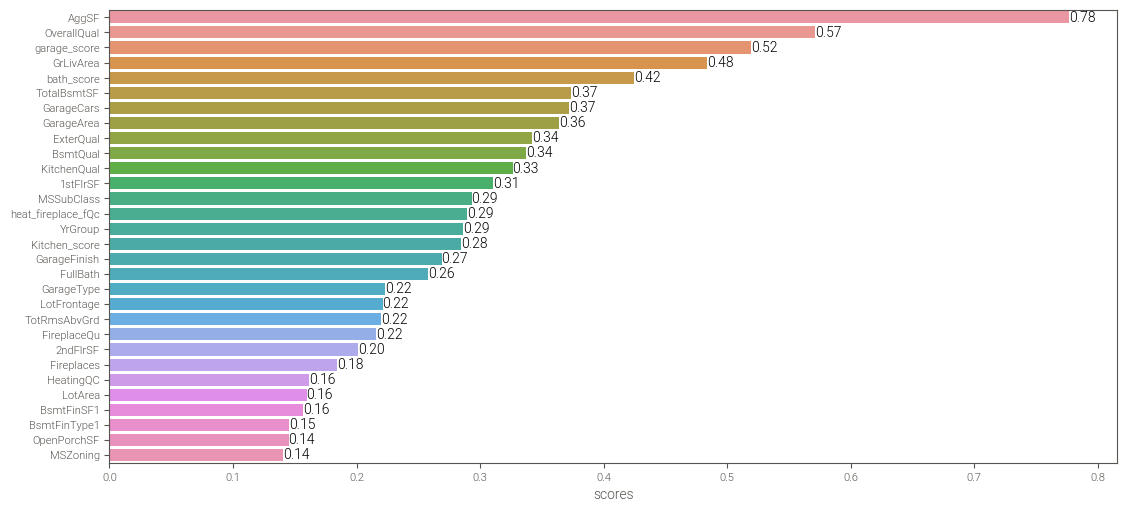

In [67]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:30], y=df_mi_score.index[:30], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

In [68]:
df[['OverallQual','OverallCond']]

,OverallQual,OverallCond
0,7,5
1,6,8
2,7,5
3,7,5
4,8,5
...,...,...
1455,6,5
1456,6,6
1457,7,9
1458,5,6


In [69]:
df['overall_score'] = df['OverallQual'] * df['OverallCond']

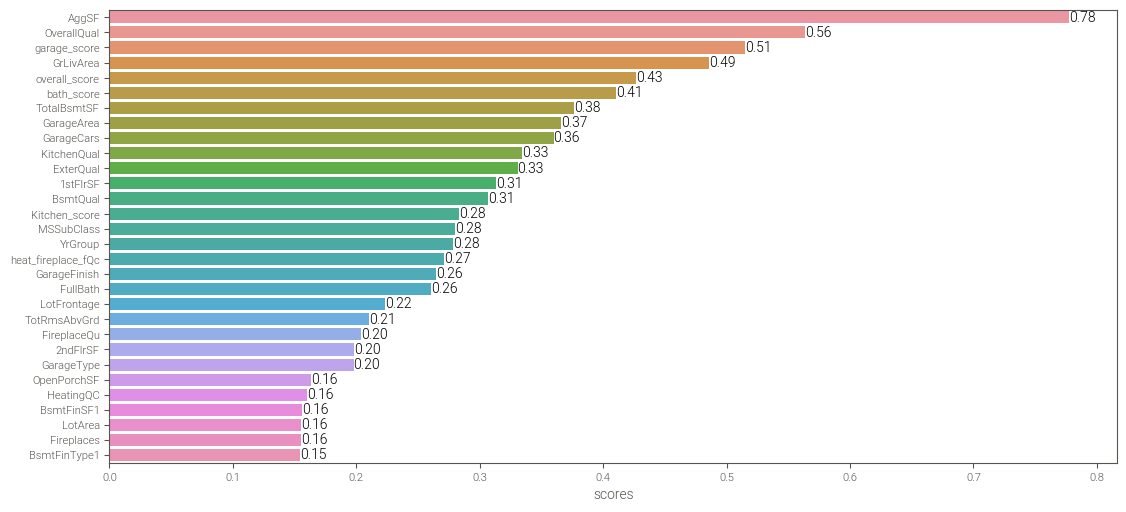

In [70]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:30], y=df_mi_score.index[:30], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

In [71]:
df['exter_score'] = df['ExterQual'] * df['ExterCond']

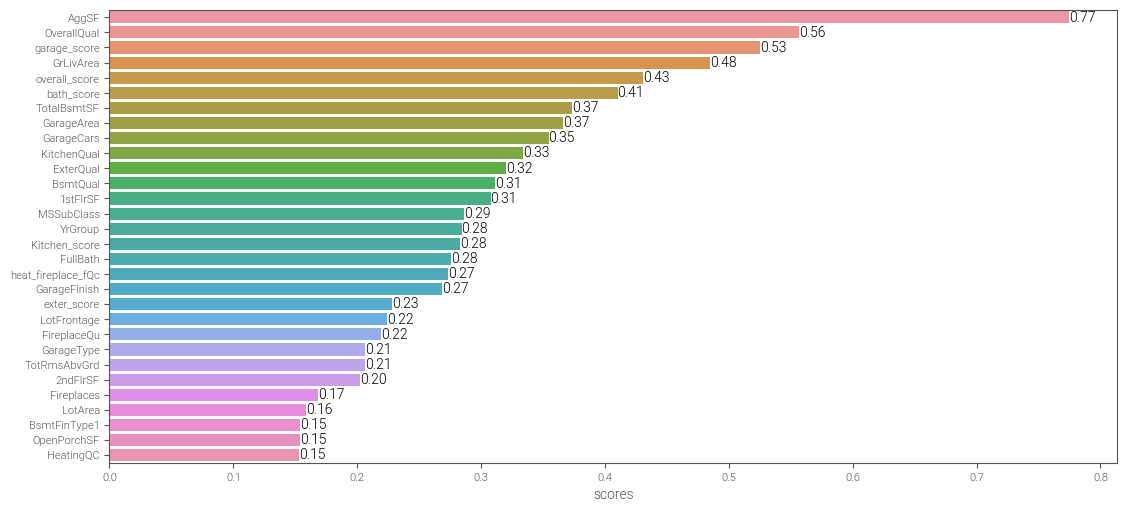

In [72]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:30], y=df_mi_score.index[:30], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

In [73]:
df[['MSSubClass','MSZoning','SalePrice']]

,MSSubClass,MSZoning,SalePrice
0,14,4,208500
1,11,4,181500
2,14,4,223500
3,10,4,140000
4,14,4,250000
...,...,...,...
1455,14,4,175000
1456,11,4,210000
1457,10,4,266500
1458,11,4,142125


<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

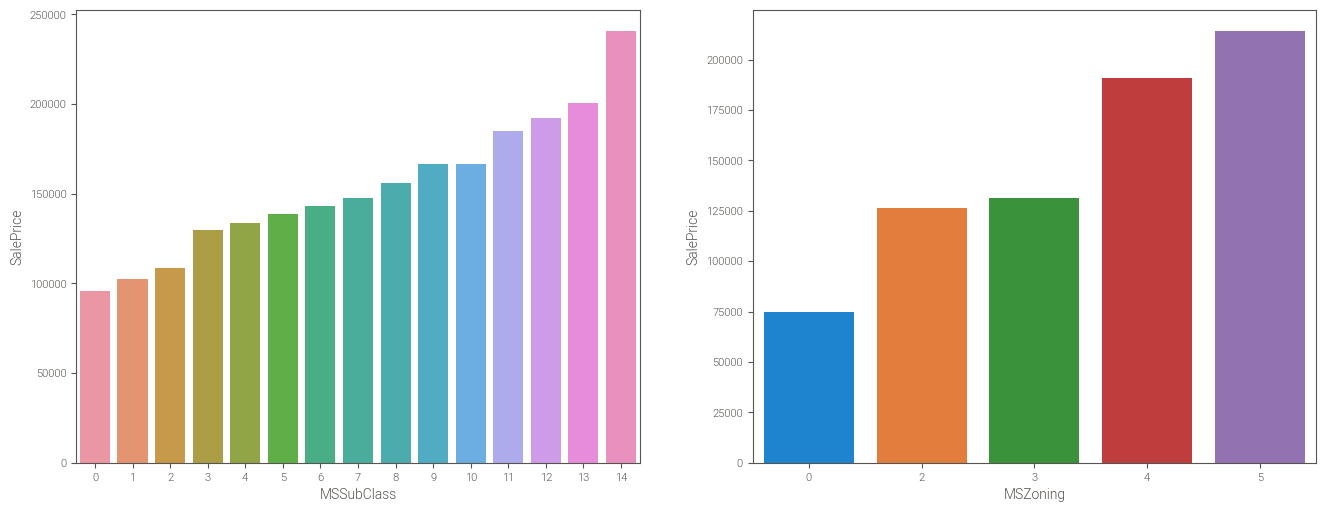

In [74]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

sns.barplot(x='MSSubClass', y='SalePrice', data=df, ax=ax1, ci=None)
sns.barplot(x='MSZoning',  y='SalePrice', data=df, ax=ax2, ci=None)


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

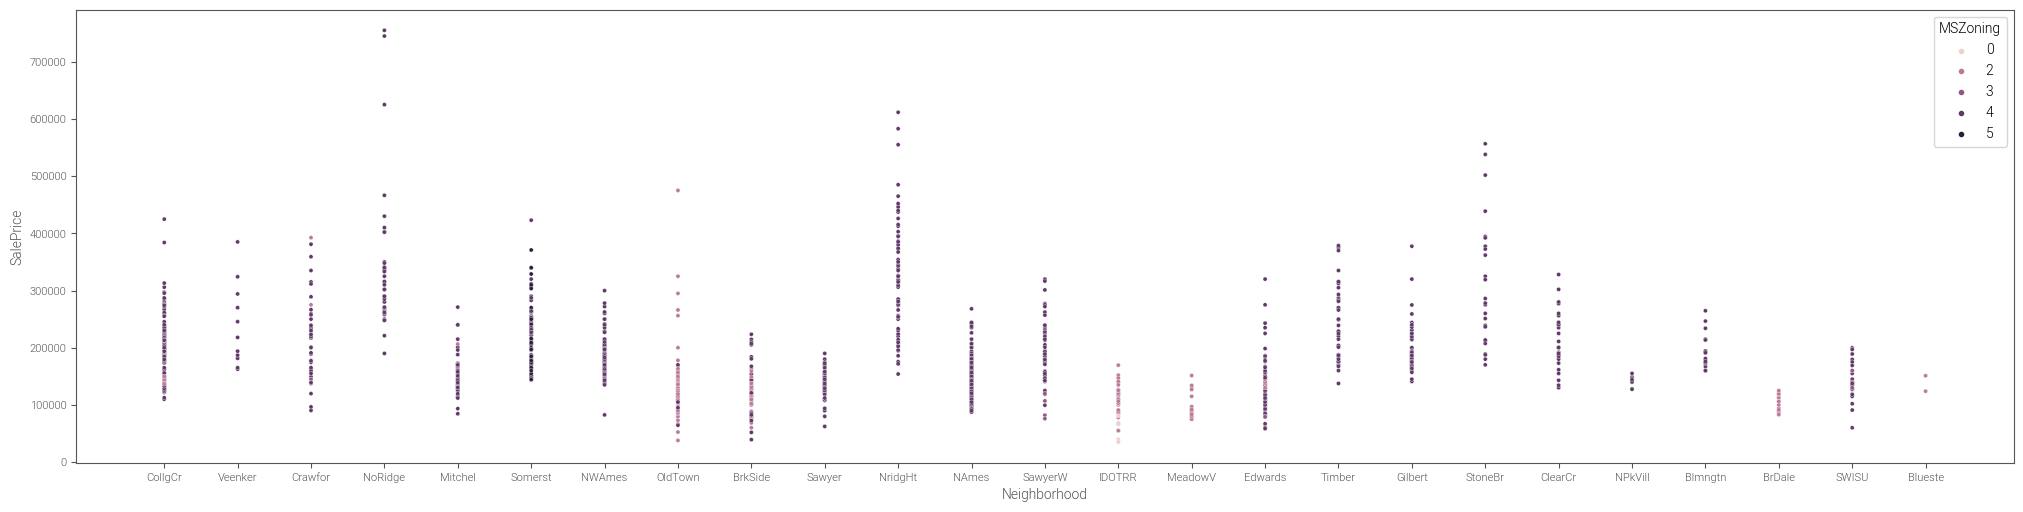

In [75]:
fig= plt.subplots(figsize=(25,6))
sns.scatterplot(x='Neighborhood', hue='MSZoning', y='SalePrice', data=df)

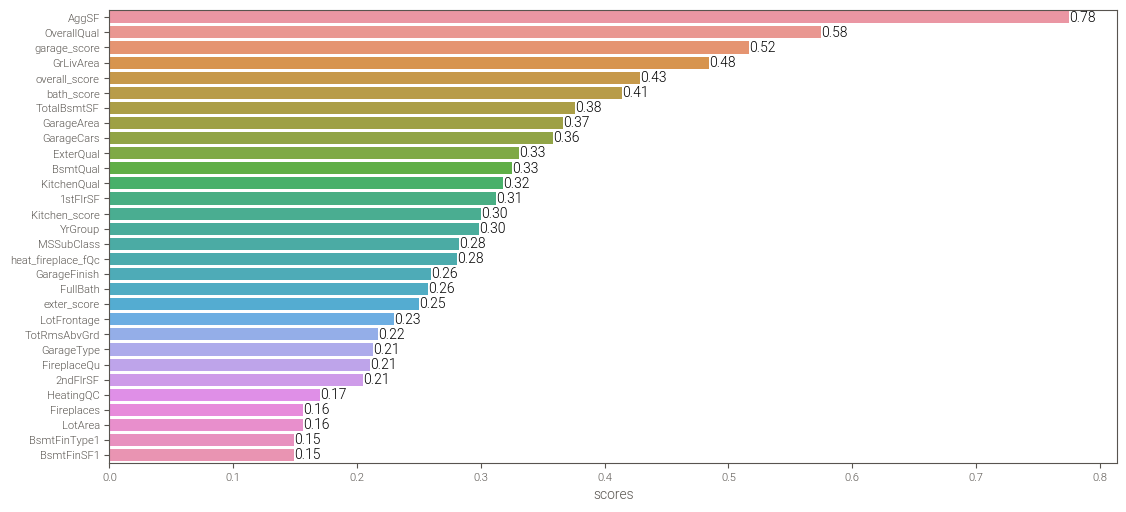

In [76]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:30], y=df_mi_score.index[:30], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

<AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>

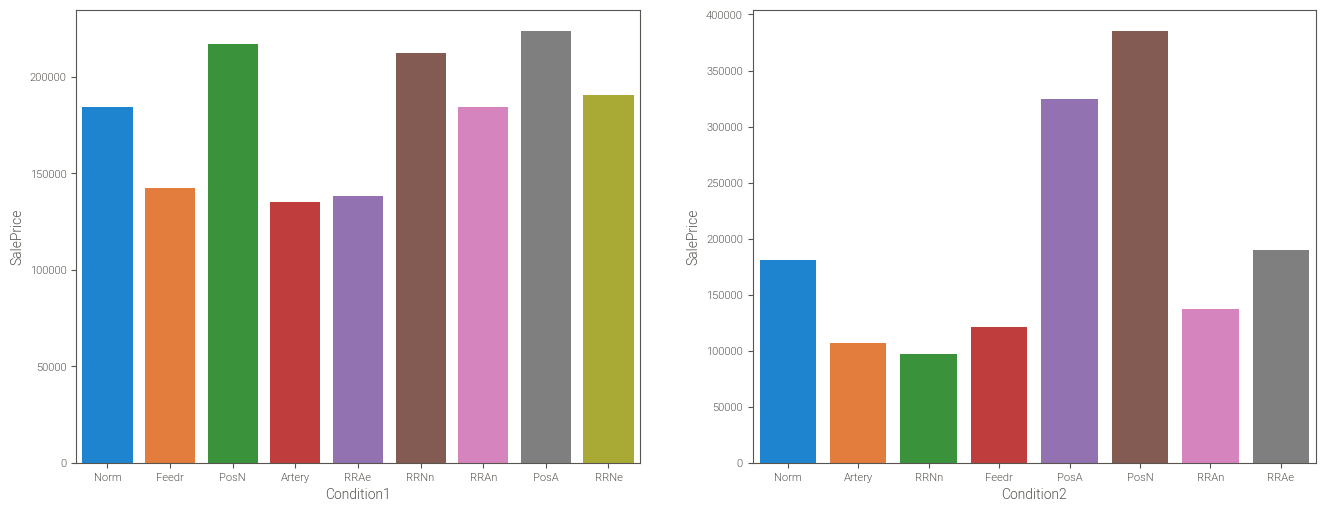

In [77]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

sns.barplot(x='Condition1', y='SalePrice', data=df, ax=ax1, ci=None)
sns.barplot(x='Condition2',  y='SalePrice', data=df, ax=ax2, ci=None)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

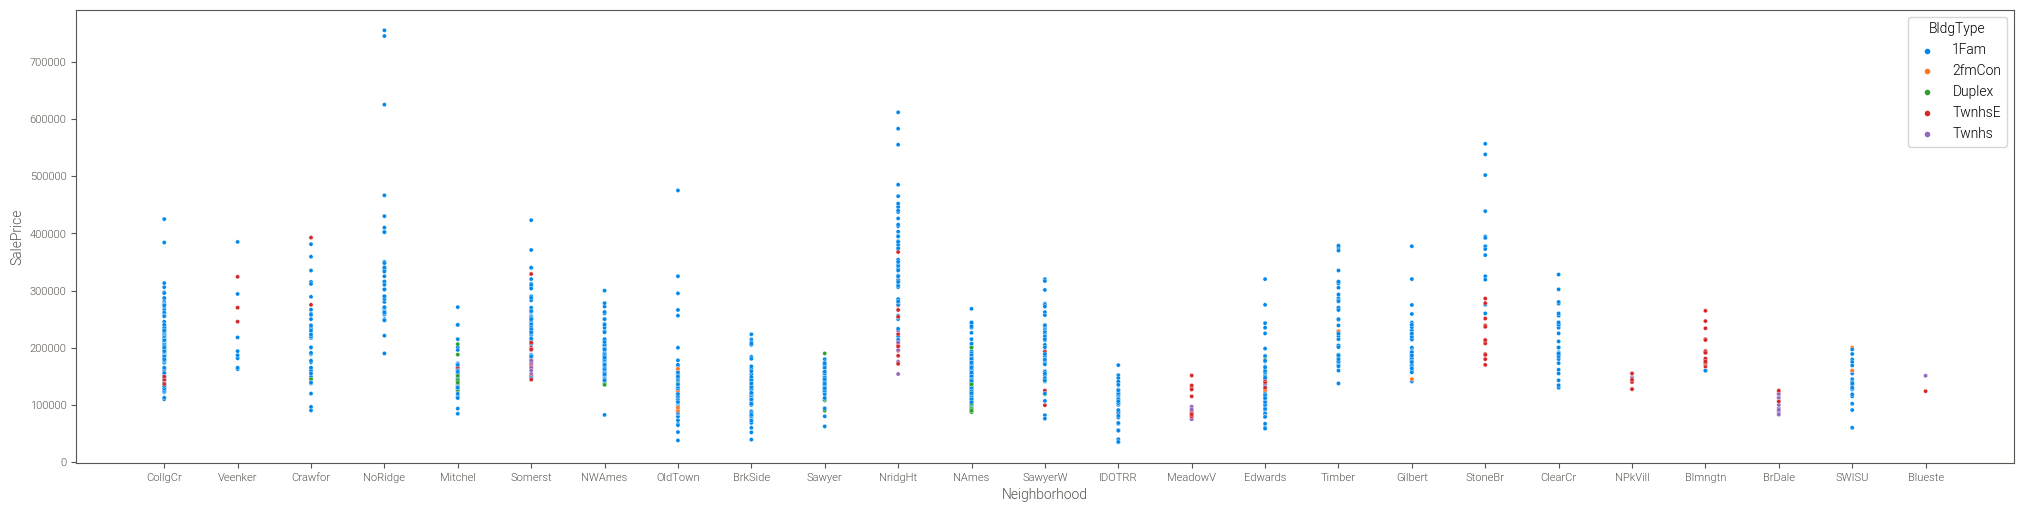

In [78]:
fig= plt.subplots(figsize=(25,6))
sns.scatterplot(x='Neighborhood', hue='BldgType', y='SalePrice', data=df)

In [79]:
print(df['Condition1'].value_counts())
print(df['Condition2'].value_counts())

Norm      1255
Feedr       80
Artery      48
RRAn        26
PosN        18
RRAe        11
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1438
Feedr        6
Artery       2
RRNn         2
RRAe         1
RRAn         1
PosN         1
PosA         1
Name: Condition2, dtype: int64


In [80]:
df[['GrLivArea','1stFlrSF','2ndFlrSF']]

,GrLivArea,1stFlrSF,2ndFlrSF
0,1710,856,854
1,1262,1262,0
2,1786,920,866
3,1717,961,756
4,2198,1145,1053
...,...,...,...
1455,1647,953,694
1456,2073,2073,0
1457,2340,1188,1152
1458,1078,1078,0


In [81]:
df['room_size']=df['GrLivArea']/df['TotRmsAbvGrd']

In [82]:
df[['GrLivArea','room_size']].describe()

,GrLivArea,room_size
count,1452.000000,1452.000000
mean,1508.752755,230.480584
std,507.188900,44.053849
min,334.000000,120.000000
25%,1128.000000,198.916667
50%,1458.000000,226.316667
75%,1774.000000,255.553571
max,4476.000000,447.600000


<AxesSubplot:xlabel='room_size', ylabel='SalePrice'>

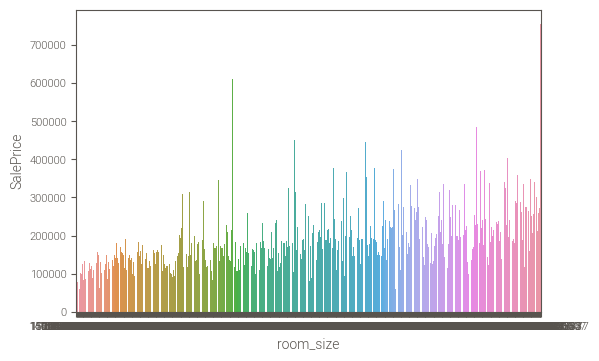

In [83]:
sns.barplot(x='room_size', y='SalePrice', data=df, ci=None)

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

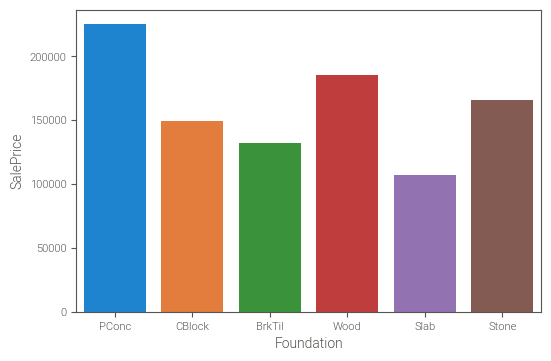

In [84]:
sns.barplot(x='Foundation', y='SalePrice', data=df, ci=None)

In [85]:
df['Foundation'].value_counts()

PConc     644
CBlock    629
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

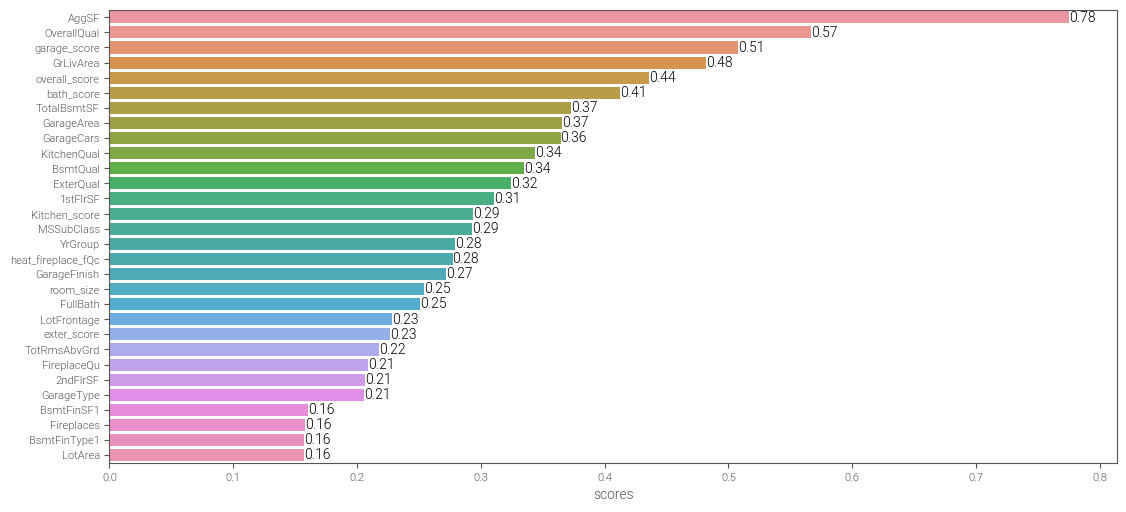

In [86]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:30], y=df_mi_score.index[:30], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

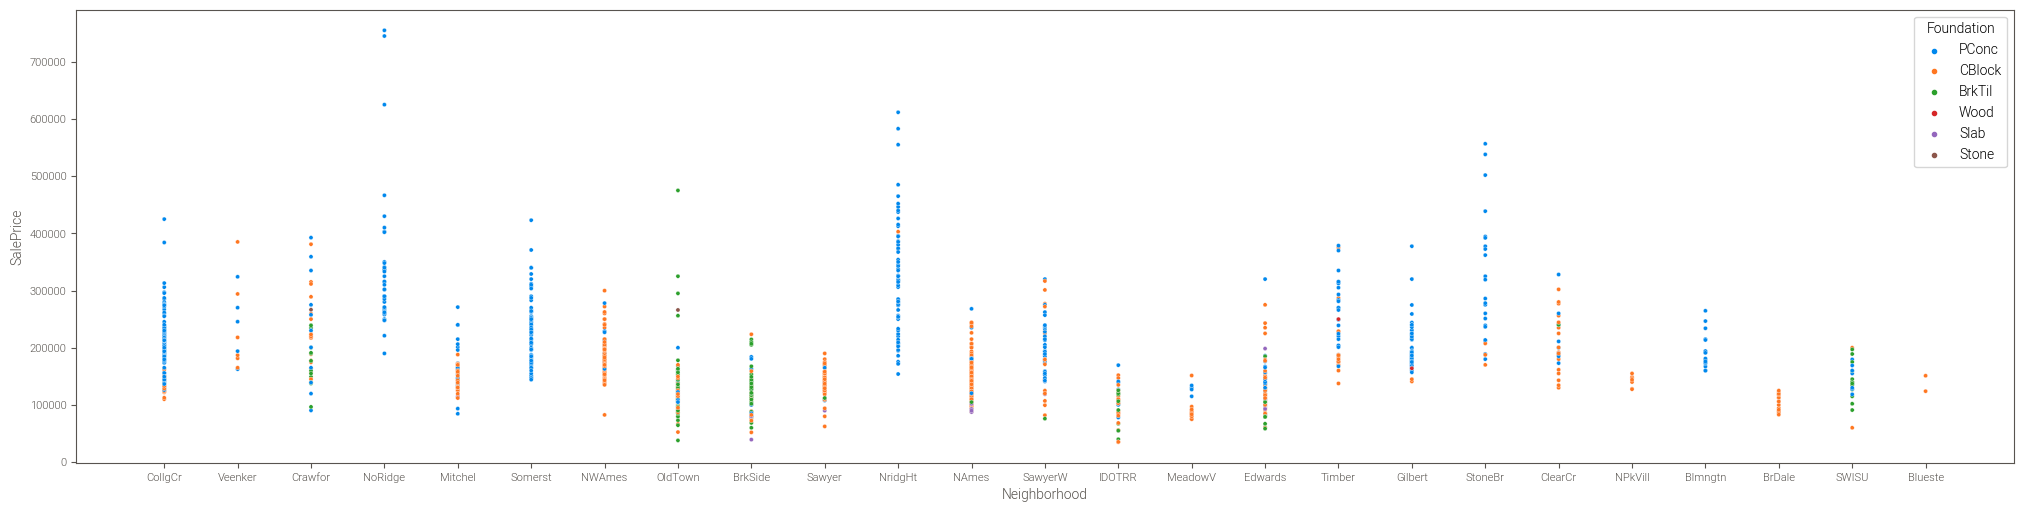

In [87]:
fig= plt.subplots(figsize=(25,6))
sns.scatterplot(x='Neighborhood', hue='Foundation', y='SalePrice', data=df)

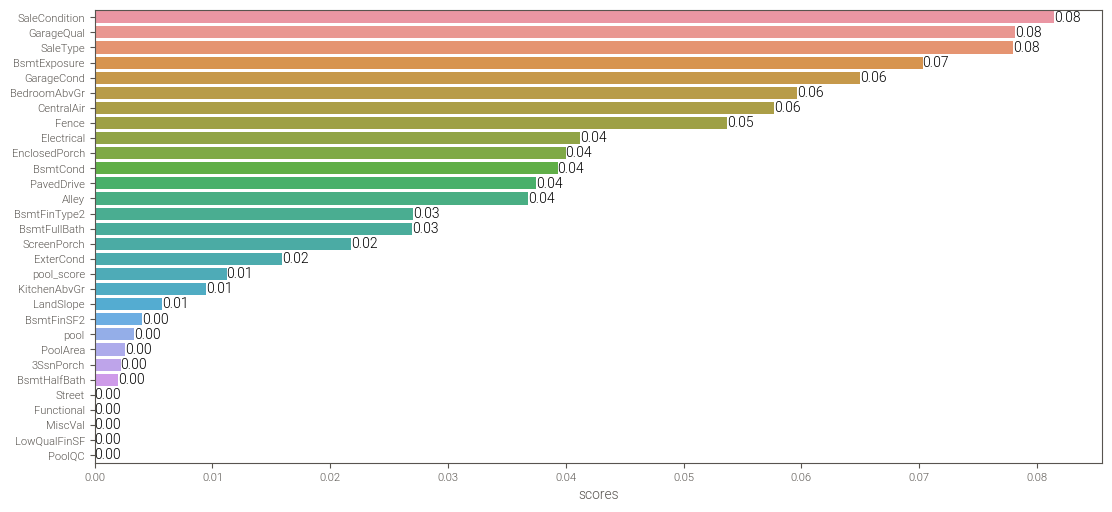

In [88]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[-30:], y=df_mi_score.index[-30:], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

In [89]:

class CrossFoldEncoder:
    def __init__(self, encoder, **kwargs):
        self.encoder_ = encoder
        self.kwargs_ = kwargs  # keyword arguments for the encoder
        self.cv_ = KFold(n_splits=5) #cross validation splits

    # Fit an encoder on one split and transform the feature on the
    # other. Iterating over the splits in all folds gives a complete
    # transformation. We also now have one trained encoder on each
    # fold.
    def fit_transform(self, X, cols):
        self.fitted_encoders_ = []
        self.cols_ = cols
        X_encoded = []
        y=X.pop('SalePrice')
        for idx_train, idx_encode in self.cv_.split(X):
            #instantiate encoder
            fitted_encoder = self.encoder_(cols=cols, **self.kwargs_)
            #fitting encoder on 4 parts of training CV
            fitted_encoder.fit(
                X.iloc[idx_train, :], y.iloc[idx_train],
            )
            #transforming on 1 part after fitting
            X_encoded.append(fitted_encoder.transform(X.iloc[idx_encode, :])[cols])
            #storing fitted encoders
            self.fitted_encoders_.append(fitted_encoder)
        #creating dataframe by concatenating 5 results
        X_encoded = pd.concat(X_encoded)
        #renaming the column
        X_encoded.columns = [name + "_encoded" for name in X_encoded.columns]
        X = X.join(X_encoded)
        X = X.join(y.to_frame(name='SalePrice'))
        return X

    # To transform the test data, average the encodings learned from
    # each fold.
    def transform(self, X):
        X_encoded_list = []
        for fitted_encoder in self.fitted_encoders_:
            #tranforming
            X_encoded = fitted_encoder.transform(X)
            #appending target encoded features
            X_encoded_list.append(X_encoded[self.cols_])
        #taking average
        X_encoded = reduce(
            lambda x, y: x.add(y, fill_value=0), X_encoded_list
        ) / len(X_encoded_list)
        X_encoded.columns = [name + "_encoded" for name in X_encoded.columns]
        X = X.join(X_encoded)
        return X

In [90]:
def target_encoder(X, training_data):
    encoder = CrossFoldEncoder(MEstimateEncoder, m=2)
    if ('SalePrice' in X.columns):
        X = encoder.fit_transform(X, cols=['Neighborhood'])
    else:
        _ = encoder.fit_transform(training_data, cols=['Neighborhood'])
        X = encoder.transform(X)
    
    return X

In [91]:
df=target_encoder(df,df)

In [92]:
df[['Neighborhood','Neighborhood_encoded']].value_counts()

Neighborhood  Neighborhood_encoded
NAmes         144314.806461           47
              144777.446363           46
              142569.148056           46
              144944.196616           43
              146601.858649           40
                                      ..
SWISU         144407.974160            2
Blueste       171997.484223            1
              161232.997131            1
NPkVill       149544.899139            1
Veenker       224425.228629            1
Length: 122, dtype: int64

<AxesSubplot:xlabel='Neighborhood_encoded', ylabel='SalePrice'>

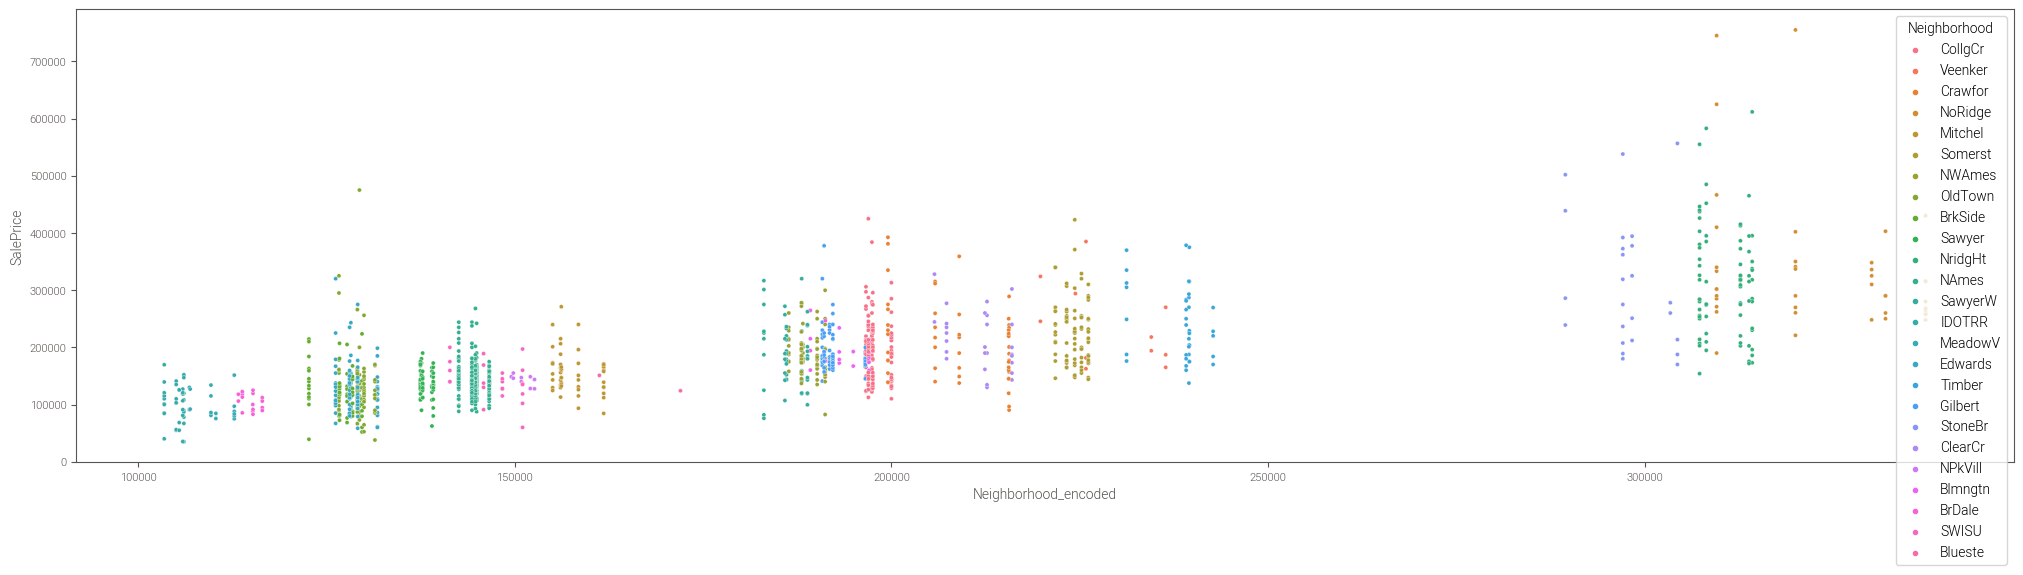

In [93]:
fig= plt.subplots(figsize=(25,6))
sns.scatterplot(x='Neighborhood_encoded', hue='Neighborhood', y='SalePrice', data=df)

In [94]:
# df['mean_N_encoded']= df.groupby('Neighborhood')['Neighborhood_encoded','Neighborhood'].mean()

In [95]:
# df[['Neighborhood','Neighborhood_encoded']].value_counts()

In [96]:
mean_enocde= {'Blueste': 166615.24067699368,
'Sawyer': 138142.8162594988,
'SWISU': 146897.47672979595,
'Edwards': 128838.06099125525,
'OldTown': 129120.76878973105,
'IDOTRR': 105081.56938059606,
'Crawfor': 208618.69984798378,
'NAmes': 144582.94615935674,
'NWAmes': 188941.59485501828,
'Gilbert': 192537.55625340954,
'NoRidge': 323182.69526876154,
'Timber': 238308.1541727995,
'MeadowV': 110175.67135423042,
'NPkVill': 151140.42429063196,
'BrDale': 114955.49449558073,
'Blmngtn': 193336.84266202463,
'BrkSide': 126758.78876588785,
'Somerst': 224283.8576837785,
'NridgHt': 310695.6776328819,
'Mitchel': 157744.29004207143,
'SawyerW': 186695.015663123,
'ClearCr': 211724.50575285163,
'StoneBr': 297788.0324605937,
'CollgCr': 197790.31817048488,
'Veenker': 229067.0159910698}

In [97]:
df['N_coded_mean']= df['Neighborhood'].map(mean_enocde)

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

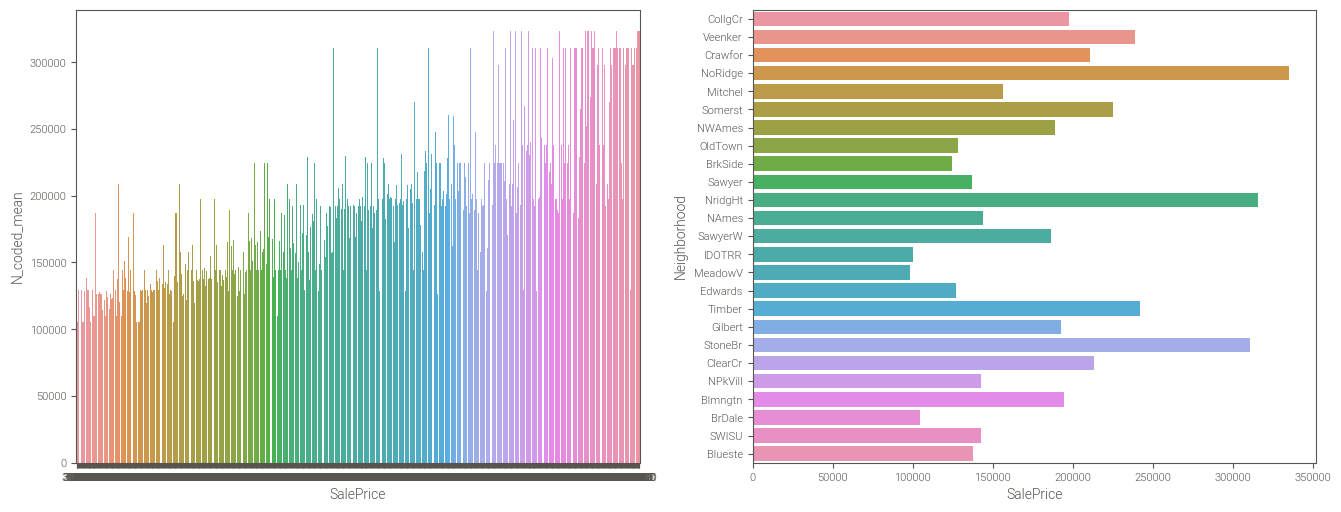

In [100]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

sns.barplot(x='SalePrice', y='N_coded_mean', data=df, ax=ax1, ci=None)
sns.barplot(x='SalePrice',  y='Neighborhood', data=df, ax=ax2, ci=None)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

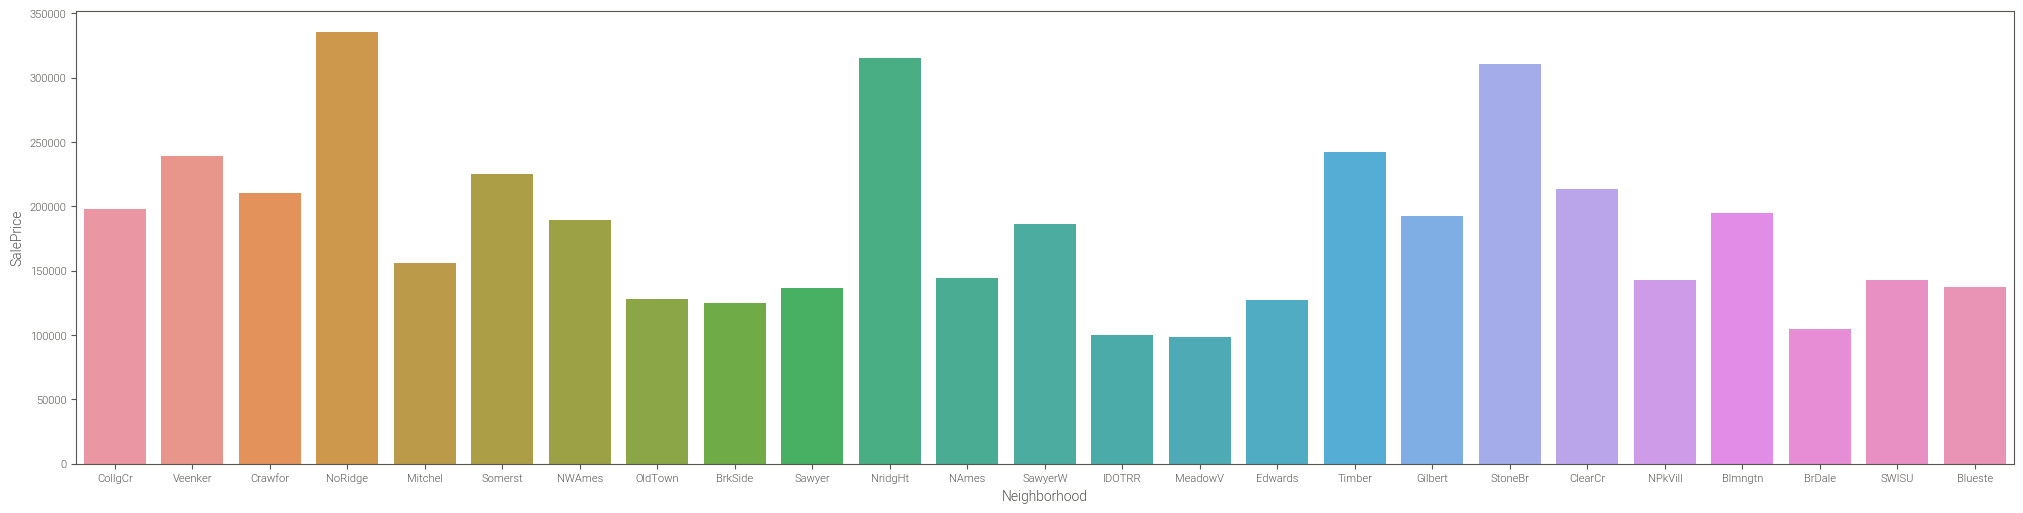

In [101]:
fig = plt.subplots(figsize=(25,6))
sns.barplot(x='Neighborhood',  y='SalePrice', data=df, ci=None)

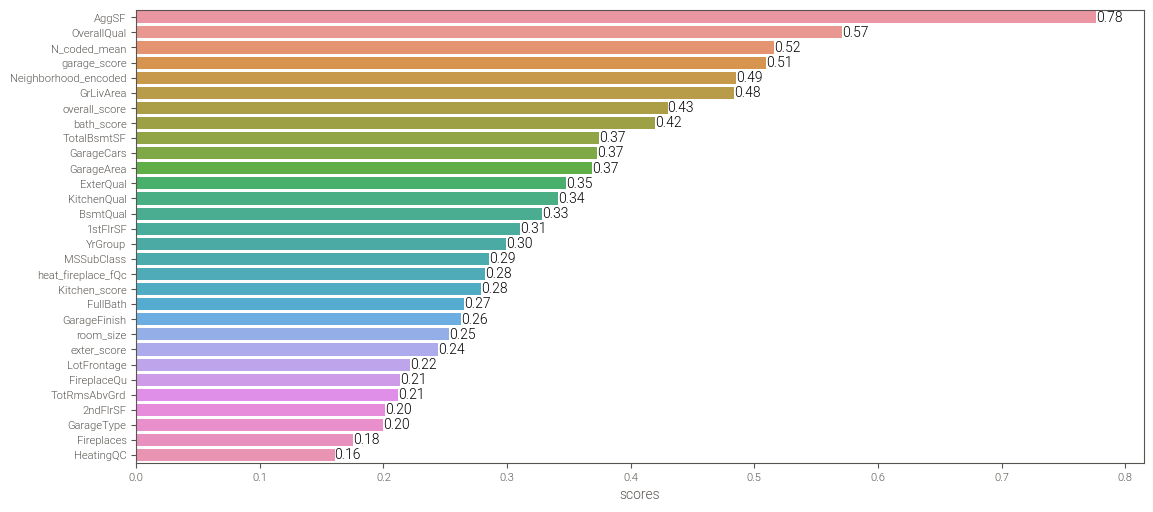

In [102]:
new_train= df.drop(["SalePrice"], axis=1)

num_col = new_train.select_dtypes(np.number).columns
mi_score = mutual_info_regression(X=df[num_col], y=df['SalePrice'])
df_mi_score = pd.Series(mi_score, index=num_col, name='scores')
df_mi_score.sort_values(ascending=False, inplace=True)

#plot
fig,ax = plt.subplots(figsize=(13,6))
sns.barplot(x=df_mi_score[:30], y=df_mi_score.index[:30], ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f');

In [105]:
#label Encoding for the years:

lab=LabelEncoder()
df["YearBuilt"] = lab.fit_transform(df["YearBuilt"])
df["YearRemodAdd"] = lab.fit_transform(df["YearRemodAdd"])
df["GarageYrBlt"] = lab.fit_transform(df["GarageYrBlt"])

In [ ]:
# df.drop(['pool', 'pool_score','PoolQC'], axis= 1, inplace= True)

In [107]:
final_df = df.copy()

In [109]:
X_numeric=final_df.select_dtypes(exclude=["object"])
skewness = X_numeric.apply(lambda x: skew(x))
skewness_features = skewness[abs(skewness) >= 0.5].index
final_df[skewness_features] = np.log1p(final_df[skewness_features])
final_df = pd.get_dummies(final_df)

In [110]:
final_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,years_model_51,years_model_52,years_model_53,years_model_54,years_model_55,years_model_56,years_model_57,years_model_58,years_model_59,years_model_60
0,2.708050,1.609438,4.189655,9.042040,0.693147,1.098612,1.386294,1.098612,7,1.791759,...,0,0,0,0,0,0,0,0,0,0
1,2.484907,1.609438,4.394449,9.169623,0.693147,1.098612,1.386294,1.098612,6,2.197225,...,0,0,0,0,0,0,0,0,0,0
2,2.708050,1.609438,4.234107,9.328212,0.693147,1.098612,1.098612,1.098612,7,1.791759,...,0,0,0,0,0,0,0,0,0,0
3,2.397895,1.609438,4.110874,9.164401,0.693147,1.098612,1.098612,1.098612,7,1.791759,...,0,0,0,0,0,0,0,0,0,0
4,2.708050,1.609438,4.442651,9.565284,0.693147,1.098612,1.098612,1.098612,8,1.791759,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.708050,1.609438,4.143135,8.976894,0.693147,1.098612,1.386294,1.098612,6,1.791759,...,0,0,0,0,0,0,0,0,0,0
1456,2.484907,1.609438,4.454347,9.486152,0.693147,1.098612,1.386294,1.098612,6,1.945910,...,0,0,0,0,0,0,0,0,0,0
1457,2.397895,1.609438,4.204693,9.109746,0.693147,1.098612,1.386294,1.098612,7,2.302585,...,0,0,0,0,0,0,0,0,0,0
1458,2.484907,1.609438,4.234107,9.181735,0.693147,1.098612,1.386294,1.098612,5,1.945910,...,0,0,0,0,0,0,0,0,0,0


In [111]:
missing_val(final_df)

,missing_ratio


In [ ]:
#square_footage_cols = ["GrLivArea", "TotalBsmtSF", "GarageArea"]

In [ ]:
#df[square_footage_cols]

In [ ]:
#final_df["AggSF"] = df["GrLivArea"] + df["TotalBsmtSF"] + df["GarageArea"]

In [ ]:
# plt.scatter(final_df["SalePrice"], final_df["AggSF"])

In [ ]:
# fig, ax = plt.subplots()
# ax.scatter(x = final_df['GrLivArea'], y = final_df['SalePrice'])
# plt.ylabel('SalePrice', fontsize=13)
# plt.xlabel('GrLivArea', fontsize=13)
# plt.show()

In [ ]:
# Deleting outliers
# final_df = final_df.drop(final_df[(final_df['GrLivArea']>4000) & (final_df['SalePrice']<300000)].index)


# fig, ax = plt.subplots()
# ax.scatter(x = final_df['GrLivArea'], y = final_df['SalePrice'])
# plt.ylabel('SalePrice', fontsize=13)
# plt.xlabel('GrLivArea', fontsize=13)
# plt.show()

In [114]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Columns: 284 entries, MSSubClass to years_model_60
dtypes: float64(63), int32(2), int64(11), uint8(208)
memory usage: 1.2 MB


In [115]:
final_df.to_csv("final_dataframe.csv", index=False)

In [116]:
missing_val(final_df)

,missing_ratio
